# Set Parameter
- Attention = True
- Teacher Forcing Ratio = 0.5
- Layer = 1
- Batch size = 128
- Learning rate = 0.001
- Hidden unit = 200
- Epochs = 100
- N = 50
- Data Length = 100K
- Data = [single_Ctype4_error_rate_1]
- Deduplication
- Random split

# Import packages

import useful packages for experiments

In [1]:
import os
import argparse
import logging
import sys
import json
import numpy as np

import torch
from torch.optim.lr_scheduler import StepLR
import torchtext

os.environ["CUDA_VISIBLE_DEVICES"]="1"
os.chdir(os.path.dirname(os.path.abspath(os.path.dirname(os.path.abspath(os.path.dirname(os.path.abspath(os.path.dirname('__file__'))))))))

from models.trainer import Trainer
from models.seq2seq import Seq2seq
from loss.loss import Perplexity
from dataset import fields

import matplotlib.pyplot as plt

# Log format

In [2]:
log_level = 'info'
LOG_FORMAT = '%(asctime)s %(levelname)-6s %(message)s'
logging.basicConfig(format=LOG_FORMAT, level=getattr(logging, log_level.upper()))

In [3]:
character_accuracy = []
sentence_accuracy = []
f1_score = []
best_f1_score = []
rnn = "lstm"
data_name = "copy"
dir_name = "separator_Ctype4_30"
pretrained_dir_name = "separator_Ctype4_60"
iterator = list(range(1,10,1))
epochs = 200

train_path = "data/"+data_name+"_rand/correction_"+dir_name+"/data_train.txt"
dev_path = "data/"+data_name+"_rand/correction_"+dir_name+"/data_test.txt"
config_path = "models/config.json"

# Prepare dataset

rnn : lstm
src vocab size = 7
tat vacab size = 10


/root/venv/lib/python3.6/site-packages/torch/nn/_reduction.py:46: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
2020-03-18 07:48:10,517 INFO   Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.002
    weight_decay: 0
), Scheduler: None


Train_path : data/copy_rand/correction_separator_Ctype4_30/data_train.txt
Dev_path = data/copy_rand/correction_separator_Ctype4_30/data_test.txt
{
    "max_len": 65,
    "embedding_size": 20,
    "hidden_size": 100,
    "input_dropout_p": 0,
    "dropout_p": 0,
    "n_layers": 1,
    "bidirectional": false,
    "rnn_cell": "lstm",
    "variable_lengths": true,
    "embedding": null,
    "update_embedding": true,
    "get_context_vector": false,
    "use_attention": true,
    "attn_layers": 1,
    "hard_attn": false,
    "position_embedding": "length",
    "pos_add": "add",
    "use_memory": "queue",
    "memory_dim": 5
}
Save_path : copy_rand_separator_Ctype4_30_att_with_pos_length_use_queue_emb20_hidden100_pretrained


/root/venv/lib/python3.6/site-packages/torch/nn/functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
2020-03-18 07:49:04,497 INFO   Finished epoch 1: Train loss: 2.8233, Dev loss: 2.3037, Accuracy(character): 0.7871, Accuracy(sentence): 0.0000, F1 Score: 0.0000
2020-03-18 07:50:00,869 INFO   Finished epoch 2: Train loss: 2.1237, Dev loss: 2.2377, Accuracy(character): 0.7862, Accuracy(sentence): 0.0000, F1 Score: 0.0000
2020-03-18 07:50:54,447 INFO   Finished epoch 3: Train loss: 2.0692, Dev loss: 2.3073, Accuracy(character): 0.7778, Accuracy(sentence): 0.0000, F1 Score: 0.0394
2020-03-18 07:51:49,349 INFO   Finished epoch 4: Train loss: 1.9832, Dev loss: 2.1234, Accuracy(character): 0.7845, Accuracy(sentence): 0.0000, F1 Score: 0.0255
2020-03-18 07:52:43,320 INFO   Finished epoch 5: Train loss: 1.9269, Dev loss: 2.1212, Accuracy(character): 0.7794, Accuracy(sentence): 0.00

2020-03-18 08:34:40,858 INFO   Finished epoch 51: Train loss: 1.1320, Dev loss: 1.2859, Accuracy(character): 0.9157, Accuracy(sentence): 0.4093, F1 Score: 0.7446
2020-03-18 08:35:34,873 INFO   Finished epoch 52: Train loss: 1.1190, Dev loss: 1.2483, Accuracy(character): 0.9217, Accuracy(sentence): 0.4693, F1 Score: 0.7638
2020-03-18 08:36:29,104 INFO   Finished epoch 53: Train loss: 1.1566, Dev loss: 1.2339, Accuracy(character): 0.9241, Accuracy(sentence): 0.4606, F1 Score: 0.7710
2020-03-18 08:37:23,931 INFO   Finished epoch 54: Train loss: 1.0949, Dev loss: 1.2283, Accuracy(character): 0.9263, Accuracy(sentence): 0.4739, F1 Score: 0.7790
2020-03-18 08:38:18,745 INFO   Finished epoch 55: Train loss: 1.1620, Dev loss: 1.2039, Accuracy(character): 0.9311, Accuracy(sentence): 0.5104, F1 Score: 0.7949
2020-03-18 08:39:14,349 INFO   Finished epoch 56: Train loss: 1.1270, Dev loss: 1.1929, Accuracy(character): 0.9372, Accuracy(sentence): 0.5469, F1 Score: 0.8142
2020-03-18 08:40:11,094 INFO

early stopping..
rnn : lstm


2020-03-18 09:13:03,768 INFO   Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.002
    weight_decay: 0
), Scheduler: None


src vocab size = 7
tat vacab size = 10
Train_path : data/copy_rand/correction_separator_Ctype4_30/data_train.txt
Dev_path = data/copy_rand/correction_separator_Ctype4_30/data_test.txt
{
    "max_len": 65,
    "embedding_size": 20,
    "hidden_size": 100,
    "input_dropout_p": 0,
    "dropout_p": 0,
    "n_layers": 1,
    "bidirectional": false,
    "rnn_cell": "lstm",
    "variable_lengths": true,
    "embedding": null,
    "update_embedding": true,
    "get_context_vector": false,
    "use_attention": true,
    "attn_layers": 1,
    "hard_attn": false,
    "position_embedding": "length",
    "pos_add": "add",
    "use_memory": "queue",
    "memory_dim": 5
}
Save_path : copy_rand_separator_Ctype4_30_att_with_pos_length_use_queue_emb20_hidden100_pretrained


2020-03-18 09:13:58,146 INFO   Finished epoch 1: Train loss: 2.7787, Dev loss: 2.2964, Accuracy(character): 0.7871, Accuracy(sentence): 0.0000, F1 Score: 0.0000
2020-03-18 09:14:52,893 INFO   Finished epoch 2: Train loss: 2.1778, Dev loss: 2.2913, Accuracy(character): 0.7871, Accuracy(sentence): 0.0000, F1 Score: 0.0000
2020-03-18 09:15:47,514 INFO   Finished epoch 3: Train loss: 2.1152, Dev loss: 2.2411, Accuracy(character): 0.7871, Accuracy(sentence): 0.0000, F1 Score: 0.0005
2020-03-18 09:16:43,781 INFO   Finished epoch 4: Train loss: 1.9789, Dev loss: 2.1591, Accuracy(character): 0.7869, Accuracy(sentence): 0.0000, F1 Score: 0.0018
2020-03-18 09:17:38,563 INFO   Finished epoch 5: Train loss: 1.9538, Dev loss: 2.1331, Accuracy(character): 0.7871, Accuracy(sentence): 0.0000, F1 Score: 0.0000
2020-03-18 09:18:32,699 INFO   Finished epoch 6: Train loss: 1.8575, Dev loss: 2.2657, Accuracy(character): 0.7593, Accuracy(sentence): 0.0003, F1 Score: 0.1179
2020-03-18 09:19:27,224 INFO   Fin

2020-03-18 10:00:56,677 INFO   Finished epoch 52: Train loss: 1.1225, Dev loss: 1.0059, Accuracy(character): 0.9983, Accuracy(sentence): 0.9778, F1 Score: 0.9957
2020-03-18 10:01:51,127 INFO   Finished epoch 53: Train loss: 1.0679, Dev loss: 1.0003, Accuracy(character): 0.9999, Accuracy(sentence): 0.9984, F1 Score: 0.9997
2020-03-18 10:02:39,776 INFO   Finished epoch 54: Train loss: 1.0061, Dev loss: 1.0656, Accuracy(character): 0.9928, Accuracy(sentence): 0.9388, F1 Score: 0.9801
2020-03-18 10:03:34,506 INFO   Finished epoch 55: Train loss: 1.0032, Dev loss: 1.0001, Accuracy(character): 1.0000, Accuracy(sentence): 0.9997, F1 Score: 1.0000
2020-03-18 10:04:28,966 INFO   Finished epoch 56: Train loss: 1.0023, Dev loss: 1.0001, Accuracy(character): 1.0000, Accuracy(sentence): 0.9999, F1 Score: 1.0000
2020-03-18 10:05:23,190 INFO   Finished epoch 57: Train loss: 1.0001, Dev loss: 1.0000, Accuracy(character): 1.0000, Accuracy(sentence): 1.0000, F1 Score: 1.0000
2020-03-18 10:06:17,469 INFO

early stopping..
rnn : lstm


2020-03-18 10:06:19,160 INFO   Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.002
    weight_decay: 0
), Scheduler: None


src vocab size = 7
tat vacab size = 10
Train_path : data/copy_rand/correction_separator_Ctype4_30/data_train.txt
Dev_path = data/copy_rand/correction_separator_Ctype4_30/data_test.txt
{
    "max_len": 65,
    "embedding_size": 20,
    "hidden_size": 100,
    "input_dropout_p": 0,
    "dropout_p": 0,
    "n_layers": 1,
    "bidirectional": false,
    "rnn_cell": "lstm",
    "variable_lengths": true,
    "embedding": null,
    "update_embedding": true,
    "get_context_vector": false,
    "use_attention": true,
    "attn_layers": 1,
    "hard_attn": false,
    "position_embedding": "length",
    "pos_add": "add",
    "use_memory": "queue",
    "memory_dim": 5
}
Save_path : copy_rand_separator_Ctype4_30_att_with_pos_length_use_queue_emb20_hidden100_pretrained


2020-03-18 10:07:12,835 INFO   Finished epoch 1: Train loss: 2.7748, Dev loss: 2.2728, Accuracy(character): 0.7871, Accuracy(sentence): 0.0000, F1 Score: 0.0000
2020-03-18 10:08:07,345 INFO   Finished epoch 2: Train loss: 2.1131, Dev loss: 2.2181, Accuracy(character): 0.7871, Accuracy(sentence): 0.0000, F1 Score: 0.0000
2020-03-18 10:09:01,534 INFO   Finished epoch 3: Train loss: 2.0393, Dev loss: 2.1866, Accuracy(character): 0.7871, Accuracy(sentence): 0.0000, F1 Score: 0.0000
2020-03-18 10:09:55,947 INFO   Finished epoch 4: Train loss: 1.9886, Dev loss: 2.1264, Accuracy(character): 0.7871, Accuracy(sentence): 0.0000, F1 Score: 0.0003
2020-03-18 10:10:49,464 INFO   Finished epoch 5: Train loss: 2.0060, Dev loss: 2.1099, Accuracy(character): 0.7871, Accuracy(sentence): 0.0000, F1 Score: 0.0003
2020-03-18 10:11:48,011 INFO   Finished epoch 6: Train loss: 1.8976, Dev loss: 2.0990, Accuracy(character): 0.7862, Accuracy(sentence): 0.0000, F1 Score: 0.0098
2020-03-18 10:12:45,034 INFO   Fin

2020-03-18 10:54:04,882 INFO   Finished epoch 52: Train loss: 1.3932, Dev loss: 1.4394, Accuracy(character): 0.8547, Accuracy(sentence): 0.1340, F1 Score: 0.5283
2020-03-18 10:54:56,840 INFO   Finished epoch 53: Train loss: 1.3833, Dev loss: 1.4879, Accuracy(character): 0.8488, Accuracy(sentence): 0.1245, F1 Score: 0.5055
2020-03-18 10:55:51,124 INFO   Finished epoch 54: Train loss: 1.3940, Dev loss: 1.5139, Accuracy(character): 0.8452, Accuracy(sentence): 0.1294, F1 Score: 0.4961
2020-03-18 10:56:45,470 INFO   Finished epoch 55: Train loss: 1.3886, Dev loss: 1.4322, Accuracy(character): 0.8582, Accuracy(sentence): 0.1343, F1 Score: 0.5705
2020-03-18 10:57:40,117 INFO   Finished epoch 56: Train loss: 1.3626, Dev loss: 1.4438, Accuracy(character): 0.8567, Accuracy(sentence): 0.1433, F1 Score: 0.5202
2020-03-18 10:58:36,918 INFO   Finished epoch 57: Train loss: 1.3769, Dev loss: 1.4399, Accuracy(character): 0.8574, Accuracy(sentence): 0.1565, F1 Score: 0.5440
2020-03-18 10:59:30,416 INFO

early stopping..
rnn : lstm


2020-03-18 11:38:12,937 INFO   Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.002
    weight_decay: 0
), Scheduler: None


src vocab size = 7
tat vacab size = 10
Train_path : data/copy_rand/correction_separator_Ctype4_30/data_train.txt
Dev_path = data/copy_rand/correction_separator_Ctype4_30/data_test.txt
{
    "max_len": 65,
    "embedding_size": 20,
    "hidden_size": 100,
    "input_dropout_p": 0,
    "dropout_p": 0,
    "n_layers": 1,
    "bidirectional": false,
    "rnn_cell": "lstm",
    "variable_lengths": true,
    "embedding": null,
    "update_embedding": true,
    "get_context_vector": false,
    "use_attention": true,
    "attn_layers": 1,
    "hard_attn": false,
    "position_embedding": "length",
    "pos_add": "add",
    "use_memory": "queue",
    "memory_dim": 5
}
Save_path : copy_rand_separator_Ctype4_30_att_with_pos_length_use_queue_emb20_hidden100_pretrained


2020-03-18 11:39:07,485 INFO   Finished epoch 1: Train loss: 2.7883, Dev loss: 2.3204, Accuracy(character): 0.7871, Accuracy(sentence): 0.0000, F1 Score: 0.0000
2020-03-18 11:40:02,078 INFO   Finished epoch 2: Train loss: 2.1704, Dev loss: 2.2546, Accuracy(character): 0.7871, Accuracy(sentence): 0.0000, F1 Score: 0.0000
2020-03-18 11:40:56,347 INFO   Finished epoch 3: Train loss: 2.0551, Dev loss: 2.2313, Accuracy(character): 0.7869, Accuracy(sentence): 0.0000, F1 Score: 0.0009
2020-03-18 11:41:50,781 INFO   Finished epoch 4: Train loss: 1.9786, Dev loss: 2.0872, Accuracy(character): 0.7870, Accuracy(sentence): 0.0000, F1 Score: 0.0008
2020-03-18 11:42:47,706 INFO   Finished epoch 5: Train loss: 1.9200, Dev loss: 2.0320, Accuracy(character): 0.7869, Accuracy(sentence): 0.0000, F1 Score: 0.0050
2020-03-18 11:43:47,861 INFO   Finished epoch 6: Train loss: 1.8799, Dev loss: 2.0091, Accuracy(character): 0.7870, Accuracy(sentence): 0.0000, F1 Score: 0.0031
2020-03-18 11:44:48,381 INFO   Fin

2020-03-18 12:25:51,326 INFO   Finished epoch 52: Train loss: 1.4609, Dev loss: 1.4533, Accuracy(character): 0.8790, Accuracy(sentence): 0.2566, F1 Score: 0.6133
2020-03-18 12:26:46,147 INFO   Finished epoch 53: Train loss: 1.2993, Dev loss: 1.6129, Accuracy(character): 0.8582, Accuracy(sentence): 0.1801, F1 Score: 0.5320
2020-03-18 12:27:42,278 INFO   Finished epoch 54: Train loss: 1.2270, Dev loss: 1.4240, Accuracy(character): 0.8813, Accuracy(sentence): 0.2734, F1 Score: 0.6304
2020-03-18 12:28:36,714 INFO   Finished epoch 55: Train loss: 1.2825, Dev loss: 1.4702, Accuracy(character): 0.8719, Accuracy(sentence): 0.2623, F1 Score: 0.6074
2020-03-18 12:29:31,179 INFO   Finished epoch 56: Train loss: 1.2375, Dev loss: 1.4350, Accuracy(character): 0.8804, Accuracy(sentence): 0.2738, F1 Score: 0.6131
2020-03-18 12:30:25,558 INFO   Finished epoch 57: Train loss: 1.4526, Dev loss: 1.7747, Accuracy(character): 0.8361, Accuracy(sentence): 0.2153, F1 Score: 0.4524
2020-03-18 12:31:19,713 INFO

2020-03-18 13:12:43,946 INFO   Finished epoch 103: Train loss: 1.0324, Dev loss: 1.1547, Accuracy(character): 0.9857, Accuracy(sentence): 0.8731, F1 Score: 0.9580
2020-03-18 13:13:38,613 INFO   Finished epoch 104: Train loss: 1.0090, Dev loss: 1.0005, Accuracy(character): 0.9999, Accuracy(sentence): 0.9974, F1 Score: 0.9997
2020-03-18 13:14:34,840 INFO   Finished epoch 105: Train loss: 1.0085, Dev loss: 1.0514, Accuracy(character): 0.9920, Accuracy(sentence): 0.8776, F1 Score: 0.9801
2020-03-18 13:15:34,986 INFO   Finished epoch 106: Train loss: 1.0103, Dev loss: 1.0017, Accuracy(character): 0.9997, Accuracy(sentence): 0.9955, F1 Score: 0.9993
2020-03-18 13:16:29,127 INFO   Finished epoch 107: Train loss: 1.0014, Dev loss: 1.0006, Accuracy(character): 0.9998, Accuracy(sentence): 0.9963, F1 Score: 0.9996
2020-03-18 13:17:24,507 INFO   Finished epoch 108: Train loss: 1.0098, Dev loss: 1.0001, Accuracy(character): 1.0000, Accuracy(sentence): 0.9995, F1 Score: 0.9999
2020-03-18 13:18:19,00

early stopping..
rnn : lstm


2020-03-18 13:26:30,254 INFO   Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.002
    weight_decay: 0
), Scheduler: None


src vocab size = 7
tat vacab size = 10
Train_path : data/copy_rand/correction_separator_Ctype4_30/data_train.txt
Dev_path = data/copy_rand/correction_separator_Ctype4_30/data_test.txt
{
    "max_len": 65,
    "embedding_size": 20,
    "hidden_size": 100,
    "input_dropout_p": 0,
    "dropout_p": 0,
    "n_layers": 1,
    "bidirectional": false,
    "rnn_cell": "lstm",
    "variable_lengths": true,
    "embedding": null,
    "update_embedding": true,
    "get_context_vector": false,
    "use_attention": true,
    "attn_layers": 1,
    "hard_attn": false,
    "position_embedding": "length",
    "pos_add": "add",
    "use_memory": "queue",
    "memory_dim": 5
}
Save_path : copy_rand_separator_Ctype4_30_att_with_pos_length_use_queue_emb20_hidden100_pretrained


2020-03-18 13:27:19,282 INFO   Finished epoch 1: Train loss: 2.7926, Dev loss: 2.3356, Accuracy(character): 0.7871, Accuracy(sentence): 0.0000, F1 Score: 0.0000
2020-03-18 13:28:13,880 INFO   Finished epoch 2: Train loss: 2.1511, Dev loss: 2.2355, Accuracy(character): 0.7871, Accuracy(sentence): 0.0000, F1 Score: 0.0000
2020-03-18 13:29:08,809 INFO   Finished epoch 3: Train loss: 2.0785, Dev loss: 2.1799, Accuracy(character): 0.7871, Accuracy(sentence): 0.0000, F1 Score: 0.0000
2020-03-18 13:30:02,414 INFO   Finished epoch 4: Train loss: 2.0357, Dev loss: 2.1355, Accuracy(character): 0.7870, Accuracy(sentence): 0.0000, F1 Score: 0.0008
2020-03-18 13:30:58,359 INFO   Finished epoch 5: Train loss: 1.9394, Dev loss: 2.1227, Accuracy(character): 0.7871, Accuracy(sentence): 0.0000, F1 Score: 0.0003
2020-03-18 13:31:54,916 INFO   Finished epoch 6: Train loss: 1.8486, Dev loss: 2.0695, Accuracy(character): 0.7862, Accuracy(sentence): 0.0000, F1 Score: 0.0084
2020-03-18 13:32:49,129 INFO   Fin

2020-03-18 14:13:51,888 INFO   Finished epoch 52: Train loss: 1.1204, Dev loss: 1.2689, Accuracy(character): 0.9142, Accuracy(sentence): 0.3972, F1 Score: 0.7429
2020-03-18 14:14:46,284 INFO   Finished epoch 53: Train loss: 1.1152, Dev loss: 1.2481, Accuracy(character): 0.9189, Accuracy(sentence): 0.4303, F1 Score: 0.7575
2020-03-18 14:15:40,787 INFO   Finished epoch 54: Train loss: 1.1107, Dev loss: 1.2526, Accuracy(character): 0.9180, Accuracy(sentence): 0.4282, F1 Score: 0.7583
2020-03-18 14:16:35,203 INFO   Finished epoch 55: Train loss: 1.1374, Dev loss: 1.2761, Accuracy(character): 0.9182, Accuracy(sentence): 0.4229, F1 Score: 0.7552
2020-03-18 14:17:29,997 INFO   Finished epoch 56: Train loss: 1.1023, Dev loss: 1.2351, Accuracy(character): 0.9230, Accuracy(sentence): 0.4515, F1 Score: 0.7703
2020-03-18 14:18:24,392 INFO   Finished epoch 57: Train loss: 1.0914, Dev loss: 1.2233, Accuracy(character): 0.9265, Accuracy(sentence): 0.4415, F1 Score: 0.7826
2020-03-18 14:19:18,525 INFO

2020-03-18 15:00:28,744 INFO   Finished epoch 103: Train loss: 1.0020, Dev loss: 1.0000, Accuracy(character): 1.0000, Accuracy(sentence): 1.0000, F1 Score: 1.0000
2020-03-18 15:01:23,164 INFO   Finished epoch 104: Train loss: 1.0284, Dev loss: 1.0001, Accuracy(character): 1.0000, Accuracy(sentence): 0.9998, F1 Score: 1.0000
2020-03-18 15:02:16,993 INFO   Finished epoch 105: Train loss: 1.0027, Dev loss: 1.0000, Accuracy(character): 1.0000, Accuracy(sentence): 0.9999, F1 Score: 1.0000
2020-03-18 15:03:11,479 INFO   Finished epoch 106: Train loss: 1.0000, Dev loss: 1.0000, Accuracy(character): 1.0000, Accuracy(sentence): 1.0000, F1 Score: 1.0000


early stopping..
rnn : lstm


2020-03-18 15:03:13,253 INFO   Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.002
    weight_decay: 0
), Scheduler: None


src vocab size = 7
tat vacab size = 10
Train_path : data/copy_rand/correction_separator_Ctype4_30/data_train.txt
Dev_path = data/copy_rand/correction_separator_Ctype4_30/data_test.txt
{
    "max_len": 65,
    "embedding_size": 20,
    "hidden_size": 100,
    "input_dropout_p": 0,
    "dropout_p": 0,
    "n_layers": 1,
    "bidirectional": false,
    "rnn_cell": "lstm",
    "variable_lengths": true,
    "embedding": null,
    "update_embedding": true,
    "get_context_vector": false,
    "use_attention": true,
    "attn_layers": 1,
    "hard_attn": false,
    "position_embedding": "length",
    "pos_add": "add",
    "use_memory": "queue",
    "memory_dim": 5
}
Save_path : copy_rand_separator_Ctype4_30_att_with_pos_length_use_queue_emb20_hidden100_pretrained


2020-03-18 15:04:08,250 INFO   Finished epoch 1: Train loss: 2.9056, Dev loss: 2.3450, Accuracy(character): 0.7871, Accuracy(sentence): 0.0000, F1 Score: 0.0000
2020-03-18 15:05:02,473 INFO   Finished epoch 2: Train loss: 2.1739, Dev loss: 2.2848, Accuracy(character): 0.7830, Accuracy(sentence): 0.0000, F1 Score: 0.0000
2020-03-18 15:05:56,856 INFO   Finished epoch 3: Train loss: 2.0541, Dev loss: 2.2209, Accuracy(character): 0.7871, Accuracy(sentence): 0.0000, F1 Score: 0.0000
2020-03-18 15:06:48,183 INFO   Finished epoch 4: Train loss: 1.9899, Dev loss: 2.2280, Accuracy(character): 0.7861, Accuracy(sentence): 0.0000, F1 Score: 0.0001
2020-03-18 15:07:42,545 INFO   Finished epoch 5: Train loss: 1.8962, Dev loss: 2.1521, Accuracy(character): 0.7870, Accuracy(sentence): 0.0000, F1 Score: 0.0000
2020-03-18 15:08:36,986 INFO   Finished epoch 6: Train loss: 1.8378, Dev loss: 2.0881, Accuracy(character): 0.7869, Accuracy(sentence): 0.0000, F1 Score: 0.0017
2020-03-18 15:09:31,469 INFO   Fin

2020-03-18 15:51:10,768 INFO   Finished epoch 52: Train loss: 1.2258, Dev loss: 1.3802, Accuracy(character): 0.8905, Accuracy(sentence): 0.3384, F1 Score: 0.6578
2020-03-18 15:52:06,641 INFO   Finished epoch 53: Train loss: 1.1920, Dev loss: 1.3534, Accuracy(character): 0.8950, Accuracy(sentence): 0.3568, F1 Score: 0.6731
2020-03-18 15:53:02,002 INFO   Finished epoch 54: Train loss: 1.1770, Dev loss: 1.3735, Accuracy(character): 0.8917, Accuracy(sentence): 0.3552, F1 Score: 0.6687
2020-03-18 15:53:56,439 INFO   Finished epoch 55: Train loss: 1.1665, Dev loss: 1.3430, Accuracy(character): 0.8991, Accuracy(sentence): 0.3650, F1 Score: 0.6862
2020-03-18 15:54:51,111 INFO   Finished epoch 56: Train loss: 1.1540, Dev loss: 1.3361, Accuracy(character): 0.9011, Accuracy(sentence): 0.3785, F1 Score: 0.6949
2020-03-18 15:55:46,408 INFO   Finished epoch 57: Train loss: 1.1463, Dev loss: 1.6306, Accuracy(character): 0.8645, Accuracy(sentence): 0.3273, F1 Score: 0.5919
2020-03-18 15:56:40,355 INFO

2020-03-18 16:38:30,456 INFO   Finished epoch 103: Train loss: 1.1492, Dev loss: 1.0049, Accuracy(character): 0.9985, Accuracy(sentence): 0.9711, F1 Score: 0.9964
2020-03-18 16:39:25,440 INFO   Finished epoch 104: Train loss: 1.0051, Dev loss: 1.0035, Accuracy(character): 0.9985, Accuracy(sentence): 0.9693, F1 Score: 0.9966
2020-03-18 16:40:20,957 INFO   Finished epoch 105: Train loss: 1.0011, Dev loss: 1.0030, Accuracy(character): 0.9987, Accuracy(sentence): 0.9724, F1 Score: 0.9968
2020-03-18 16:41:16,655 INFO   Finished epoch 106: Train loss: 1.0149, Dev loss: 1.0025, Accuracy(character): 0.9988, Accuracy(sentence): 0.9738, F1 Score: 0.9971
2020-03-18 16:42:12,556 INFO   Finished epoch 107: Train loss: 1.0018, Dev loss: 1.0037, Accuracy(character): 0.9983, Accuracy(sentence): 0.9640, F1 Score: 0.9960
2020-03-18 16:43:12,013 INFO   Finished epoch 108: Train loss: 1.0038, Dev loss: 1.0026, Accuracy(character): 0.9986, Accuracy(sentence): 0.9704, F1 Score: 0.9967
2020-03-18 16:44:08,31

early stopping..
rnn : lstm


2020-03-18 17:08:23,268 INFO   Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.002
    weight_decay: 0
), Scheduler: None


src vocab size = 7
tat vacab size = 10
Train_path : data/copy_rand/correction_separator_Ctype4_30/data_train.txt
Dev_path = data/copy_rand/correction_separator_Ctype4_30/data_test.txt
{
    "max_len": 65,
    "embedding_size": 20,
    "hidden_size": 100,
    "input_dropout_p": 0,
    "dropout_p": 0,
    "n_layers": 1,
    "bidirectional": false,
    "rnn_cell": "lstm",
    "variable_lengths": true,
    "embedding": null,
    "update_embedding": true,
    "get_context_vector": false,
    "use_attention": true,
    "attn_layers": 1,
    "hard_attn": false,
    "position_embedding": "length",
    "pos_add": "add",
    "use_memory": "queue",
    "memory_dim": 5
}
Save_path : copy_rand_separator_Ctype4_30_att_with_pos_length_use_queue_emb20_hidden100_pretrained


2020-03-18 17:09:19,641 INFO   Finished epoch 1: Train loss: 2.7661, Dev loss: 2.2799, Accuracy(character): 0.7871, Accuracy(sentence): 0.0000, F1 Score: 0.0000
2020-03-18 17:10:15,288 INFO   Finished epoch 2: Train loss: 2.1435, Dev loss: 2.2890, Accuracy(character): 0.7869, Accuracy(sentence): 0.0000, F1 Score: 0.0012
2020-03-18 17:11:12,657 INFO   Finished epoch 3: Train loss: 2.0757, Dev loss: 2.2015, Accuracy(character): 0.7871, Accuracy(sentence): 0.0000, F1 Score: 0.0000
2020-03-18 17:12:08,329 INFO   Finished epoch 4: Train loss: 2.0248, Dev loss: 2.1379, Accuracy(character): 0.7870, Accuracy(sentence): 0.0000, F1 Score: 0.0030
2020-03-18 17:13:04,299 INFO   Finished epoch 5: Train loss: 1.9914, Dev loss: 2.1118, Accuracy(character): 0.7871, Accuracy(sentence): 0.0000, F1 Score: 0.0008
2020-03-18 17:14:00,214 INFO   Finished epoch 6: Train loss: 1.9418, Dev loss: 2.0697, Accuracy(character): 0.7867, Accuracy(sentence): 0.0000, F1 Score: 0.0069
2020-03-18 17:14:58,819 INFO   Fin

2020-03-18 17:57:21,505 INFO   Finished epoch 52: Train loss: 1.3793, Dev loss: 1.7808, Accuracy(character): 0.8190, Accuracy(sentence): 0.0958, F1 Score: 0.3654
2020-03-18 17:58:17,770 INFO   Finished epoch 53: Train loss: 1.3673, Dev loss: 1.5252, Accuracy(character): 0.8587, Accuracy(sentence): 0.2035, F1 Score: 0.5297
2020-03-18 17:59:14,166 INFO   Finished epoch 54: Train loss: 1.3455, Dev loss: 1.7189, Accuracy(character): 0.8238, Accuracy(sentence): 0.1380, F1 Score: 0.3995
2020-03-18 18:00:08,564 INFO   Finished epoch 55: Train loss: 1.4249, Dev loss: 1.7808, Accuracy(character): 0.8118, Accuracy(sentence): 0.1239, F1 Score: 0.3495
2020-03-18 18:01:04,399 INFO   Finished epoch 56: Train loss: 1.3765, Dev loss: 1.5487, Accuracy(character): 0.8544, Accuracy(sentence): 0.1984, F1 Score: 0.5412
2020-03-18 18:02:04,860 INFO   Finished epoch 57: Train loss: 1.3466, Dev loss: 1.6146, Accuracy(character): 0.8275, Accuracy(sentence): 0.1478, F1 Score: 0.4178
2020-03-18 18:03:00,919 INFO

2020-03-18 18:44:54,491 INFO   Finished epoch 103: Train loss: 1.0827, Dev loss: 1.1654, Accuracy(character): 0.9488, Accuracy(sentence): 0.5607, F1 Score: 0.8556
2020-03-18 18:45:49,961 INFO   Finished epoch 104: Train loss: 1.1410, Dev loss: 1.1806, Accuracy(character): 0.9454, Accuracy(sentence): 0.5508, F1 Score: 0.8441
2020-03-18 18:46:44,906 INFO   Finished epoch 105: Train loss: 1.0855, Dev loss: 1.2539, Accuracy(character): 0.9365, Accuracy(sentence): 0.5348, F1 Score: 0.8206
2020-03-18 18:47:41,611 INFO   Finished epoch 106: Train loss: 1.0617, Dev loss: 1.1205, Accuracy(character): 0.9609, Accuracy(sentence): 0.6173, F1 Score: 0.8919
2020-03-18 18:48:39,797 INFO   Finished epoch 107: Train loss: 1.0747, Dev loss: 1.1685, Accuracy(character): 0.9535, Accuracy(sentence): 0.5985, F1 Score: 0.8708
2020-03-18 18:49:33,968 INFO   Finished epoch 108: Train loss: 1.0990, Dev loss: 1.0973, Accuracy(character): 0.9679, Accuracy(sentence): 0.6446, F1 Score: 0.9134
2020-03-18 18:50:29,67

early stopping..
rnn : lstm


2020-03-18 19:12:53,962 INFO   Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.002
    weight_decay: 0
), Scheduler: None


src vocab size = 7
tat vacab size = 10
Train_path : data/copy_rand/correction_separator_Ctype4_30/data_train.txt
Dev_path = data/copy_rand/correction_separator_Ctype4_30/data_test.txt
{
    "max_len": 65,
    "embedding_size": 20,
    "hidden_size": 100,
    "input_dropout_p": 0,
    "dropout_p": 0,
    "n_layers": 1,
    "bidirectional": false,
    "rnn_cell": "lstm",
    "variable_lengths": true,
    "embedding": null,
    "update_embedding": true,
    "get_context_vector": false,
    "use_attention": true,
    "attn_layers": 1,
    "hard_attn": false,
    "position_embedding": "length",
    "pos_add": "add",
    "use_memory": "queue",
    "memory_dim": 5
}
Save_path : copy_rand_separator_Ctype4_30_att_with_pos_length_use_queue_emb20_hidden100_pretrained


2020-03-18 19:13:49,951 INFO   Finished epoch 1: Train loss: 2.7253, Dev loss: 2.2850, Accuracy(character): 0.7871, Accuracy(sentence): 0.0000, F1 Score: 0.0000
2020-03-18 19:14:43,852 INFO   Finished epoch 2: Train loss: 2.1358, Dev loss: 2.2343, Accuracy(character): 0.7871, Accuracy(sentence): 0.0000, F1 Score: 0.0000
2020-03-18 19:15:37,439 INFO   Finished epoch 3: Train loss: 2.1257, Dev loss: 2.1557, Accuracy(character): 0.7871, Accuracy(sentence): 0.0000, F1 Score: 0.0000
2020-03-18 19:16:32,109 INFO   Finished epoch 4: Train loss: 2.0043, Dev loss: 2.1346, Accuracy(character): 0.7866, Accuracy(sentence): 0.0000, F1 Score: 0.0004
2020-03-18 19:17:27,076 INFO   Finished epoch 5: Train loss: 1.9571, Dev loss: 2.1219, Accuracy(character): 0.7871, Accuracy(sentence): 0.0000, F1 Score: 0.0000
2020-03-18 19:18:22,826 INFO   Finished epoch 6: Train loss: 1.8629, Dev loss: 2.1123, Accuracy(character): 0.7871, Accuracy(sentence): 0.0000, F1 Score: 0.0002
2020-03-18 19:19:23,596 INFO   Fin

2020-03-18 20:01:41,516 INFO   Finished epoch 52: Train loss: 1.2770, Dev loss: 1.3956, Accuracy(character): 0.8851, Accuracy(sentence): 0.2374, F1 Score: 0.6366
2020-03-18 20:02:42,271 INFO   Finished epoch 53: Train loss: 1.2338, Dev loss: 1.3898, Accuracy(character): 0.8832, Accuracy(sentence): 0.2328, F1 Score: 0.6398
2020-03-18 20:03:42,799 INFO   Finished epoch 54: Train loss: 1.3805, Dev loss: 1.4057, Accuracy(character): 0.8807, Accuracy(sentence): 0.2302, F1 Score: 0.6250
2020-03-18 20:04:27,764 INFO   Finished epoch 55: Train loss: 1.1847, Dev loss: 1.5469, Accuracy(character): 0.8633, Accuracy(sentence): 0.2084, F1 Score: 0.5701
2020-03-18 20:05:22,752 INFO   Finished epoch 56: Train loss: 1.3166, Dev loss: 1.6688, Accuracy(character): 0.8424, Accuracy(sentence): 0.1810, F1 Score: 0.5122
2020-03-18 20:06:18,681 INFO   Finished epoch 57: Train loss: 1.2843, Dev loss: 1.3783, Accuracy(character): 0.8857, Accuracy(sentence): 0.2468, F1 Score: 0.6452
2020-03-18 20:07:14,447 INFO

2020-03-18 20:49:35,712 INFO   Finished epoch 103: Train loss: 1.0050, Dev loss: 1.1831, Accuracy(character): 0.9728, Accuracy(sentence): 0.7923, F1 Score: 0.9251
2020-03-18 20:50:31,229 INFO   Finished epoch 104: Train loss: 1.0376, Dev loss: 1.0066, Accuracy(character): 0.9988, Accuracy(sentence): 0.9809, F1 Score: 0.9965
2020-03-18 20:51:26,954 INFO   Finished epoch 105: Train loss: 1.0107, Dev loss: 1.0010, Accuracy(character): 0.9998, Accuracy(sentence): 0.9955, F1 Score: 0.9994
2020-03-18 20:52:22,227 INFO   Finished epoch 106: Train loss: 1.0006, Dev loss: 1.0008, Accuracy(character): 0.9997, Accuracy(sentence): 0.9939, F1 Score: 0.9993
2020-03-18 20:53:16,295 INFO   Finished epoch 107: Train loss: 1.0081, Dev loss: 1.0005, Accuracy(character): 0.9999, Accuracy(sentence): 0.9971, F1 Score: 0.9996
2020-03-18 20:54:12,343 INFO   Finished epoch 108: Train loss: 1.0005, Dev loss: 1.0001, Accuracy(character): 1.0000, Accuracy(sentence): 0.9998, F1 Score: 1.0000
2020-03-18 20:55:08,25

early stopping..
rnn : lstm


2020-03-18 21:13:56,981 INFO   Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.002
    weight_decay: 0
), Scheduler: None


src vocab size = 7
tat vacab size = 10
Train_path : data/copy_rand/correction_separator_Ctype4_30/data_train.txt
Dev_path = data/copy_rand/correction_separator_Ctype4_30/data_test.txt
{
    "max_len": 65,
    "embedding_size": 20,
    "hidden_size": 100,
    "input_dropout_p": 0,
    "dropout_p": 0,
    "n_layers": 1,
    "bidirectional": false,
    "rnn_cell": "lstm",
    "variable_lengths": true,
    "embedding": null,
    "update_embedding": true,
    "get_context_vector": false,
    "use_attention": true,
    "attn_layers": 1,
    "hard_attn": false,
    "position_embedding": "length",
    "pos_add": "add",
    "use_memory": "queue",
    "memory_dim": 5
}
Save_path : copy_rand_separator_Ctype4_30_att_with_pos_length_use_queue_emb20_hidden100_pretrained


2020-03-18 21:14:52,805 INFO   Finished epoch 1: Train loss: 2.8063, Dev loss: 2.3085, Accuracy(character): 0.7871, Accuracy(sentence): 0.0000, F1 Score: 0.0000
2020-03-18 21:15:48,889 INFO   Finished epoch 2: Train loss: 2.1496, Dev loss: 2.1790, Accuracy(character): 0.7871, Accuracy(sentence): 0.0000, F1 Score: 0.0001
2020-03-18 21:16:44,993 INFO   Finished epoch 3: Train loss: 2.0575, Dev loss: 2.1603, Accuracy(character): 0.7871, Accuracy(sentence): 0.0000, F1 Score: 0.0000
2020-03-18 21:17:42,090 INFO   Finished epoch 4: Train loss: 1.9936, Dev loss: 2.1329, Accuracy(character): 0.7871, Accuracy(sentence): 0.0000, F1 Score: 0.0001
2020-03-18 21:18:34,970 INFO   Finished epoch 5: Train loss: 1.9374, Dev loss: 1.9999, Accuracy(character): 0.7887, Accuracy(sentence): 0.0000, F1 Score: 0.0569
2020-03-18 21:19:31,774 INFO   Finished epoch 6: Train loss: 1.8481, Dev loss: 1.9695, Accuracy(character): 0.7901, Accuracy(sentence): 0.0000, F1 Score: 0.0760
2020-03-18 21:20:28,420 INFO   Fin

2020-03-18 22:02:37,723 INFO   Finished epoch 52: Train loss: 1.1269, Dev loss: 1.1615, Accuracy(character): 0.9416, Accuracy(sentence): 0.4967, F1 Score: 0.8231
2020-03-18 22:03:33,110 INFO   Finished epoch 53: Train loss: 1.2666, Dev loss: 1.2518, Accuracy(character): 0.9154, Accuracy(sentence): 0.4389, F1 Score: 0.7456
2020-03-18 22:04:30,148 INFO   Finished epoch 54: Train loss: 1.1253, Dev loss: 1.2756, Accuracy(character): 0.9007, Accuracy(sentence): 0.3808, F1 Score: 0.7169
2020-03-18 22:05:32,923 INFO   Finished epoch 55: Train loss: 1.1512, Dev loss: 1.1409, Accuracy(character): 0.9520, Accuracy(sentence): 0.5706, F1 Score: 0.8578
2020-03-18 22:06:32,896 INFO   Finished epoch 56: Train loss: 1.1166, Dev loss: 1.2397, Accuracy(character): 0.9300, Accuracy(sentence): 0.5246, F1 Score: 0.7907
2020-03-18 22:07:30,606 INFO   Finished epoch 57: Train loss: 1.1578, Dev loss: 1.2688, Accuracy(character): 0.9055, Accuracy(sentence): 0.3798, F1 Score: 0.7189
2020-03-18 22:08:27,084 INFO

early stopping..


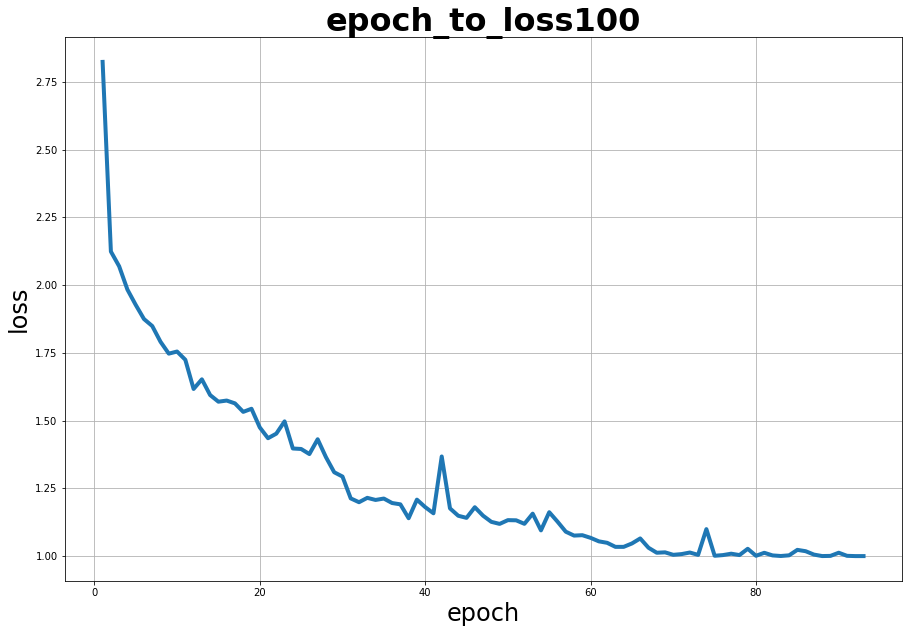

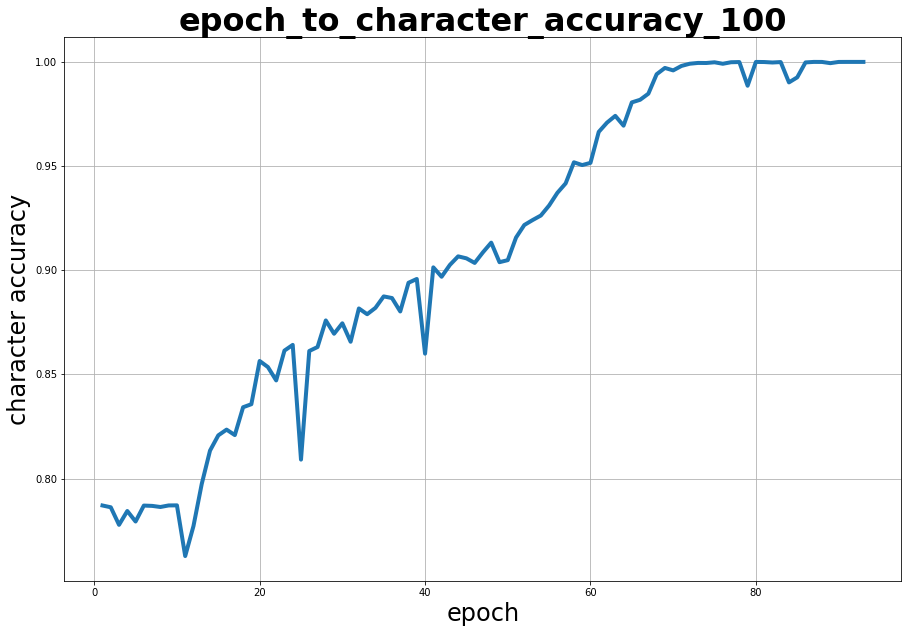

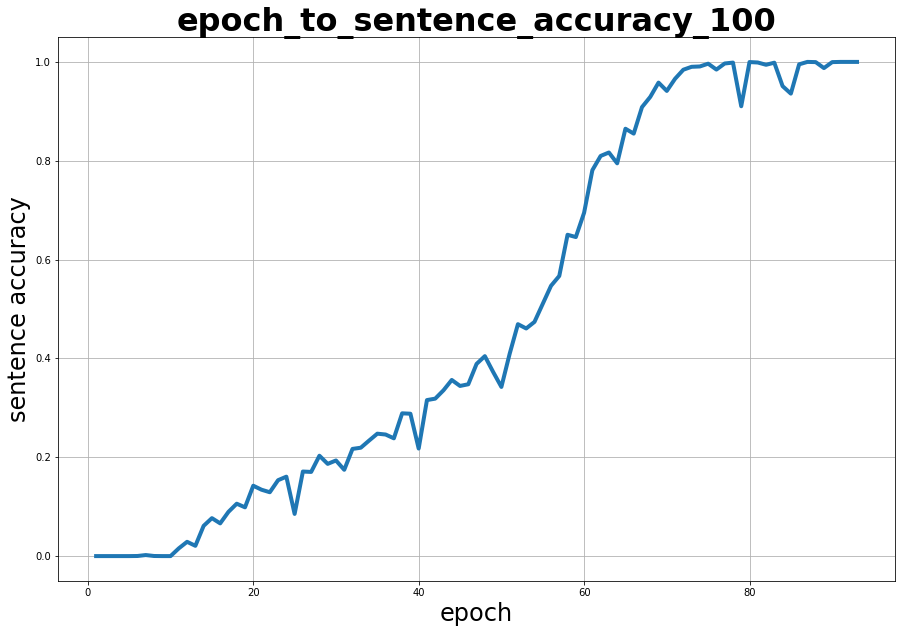

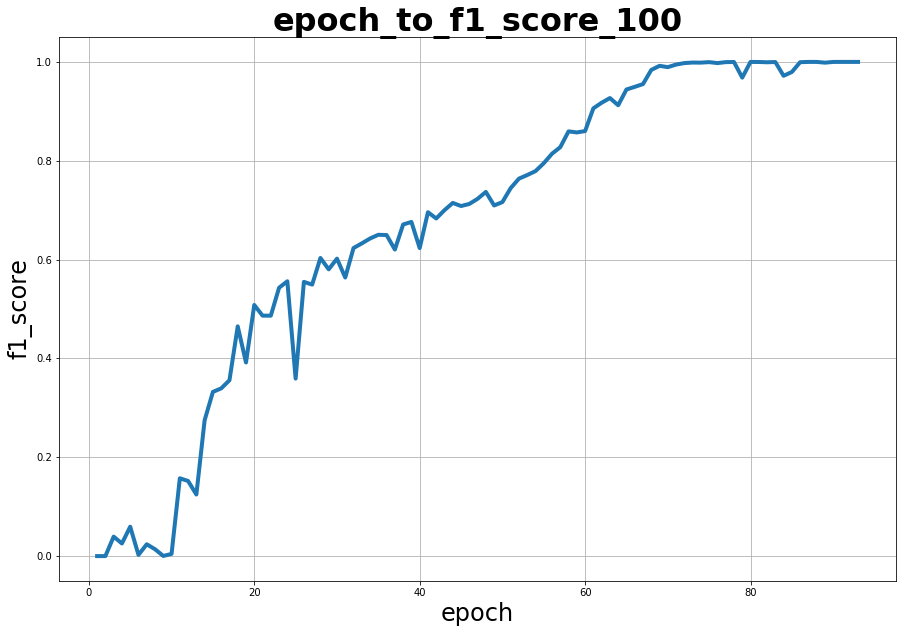

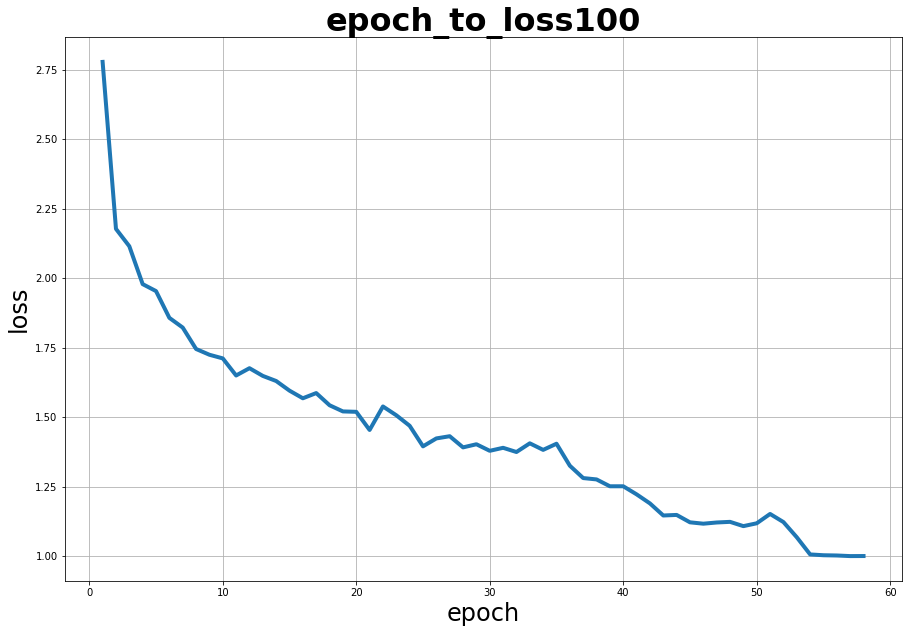

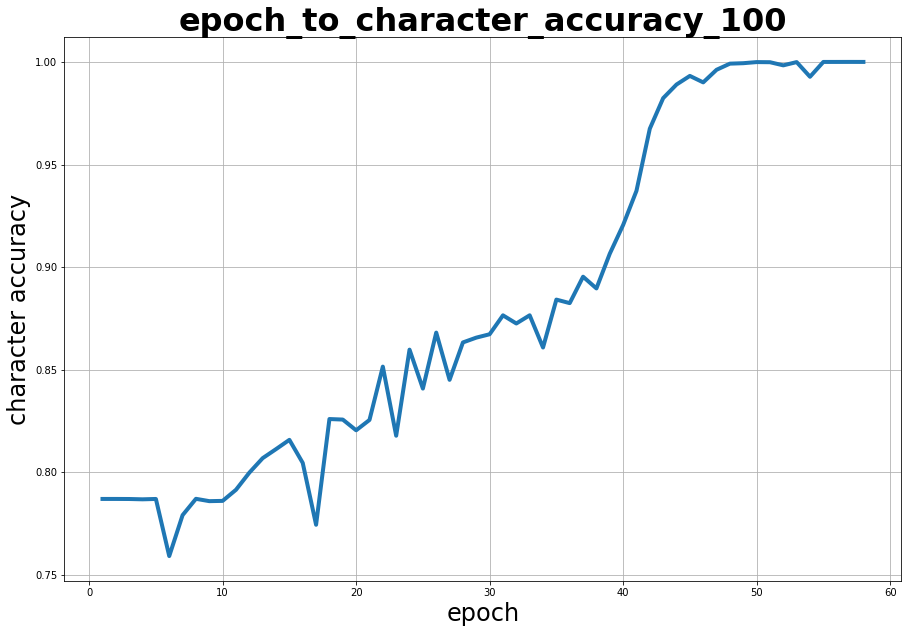

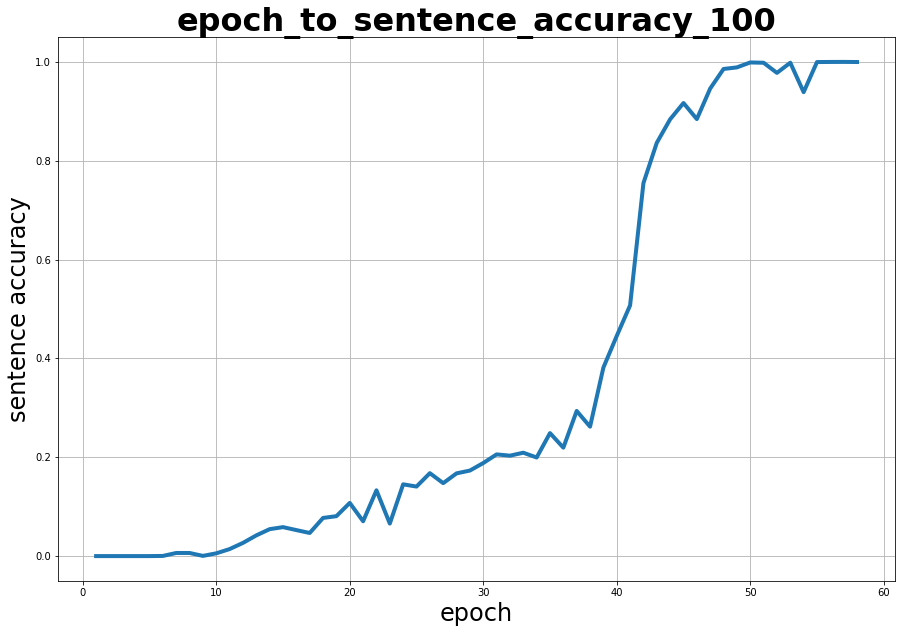

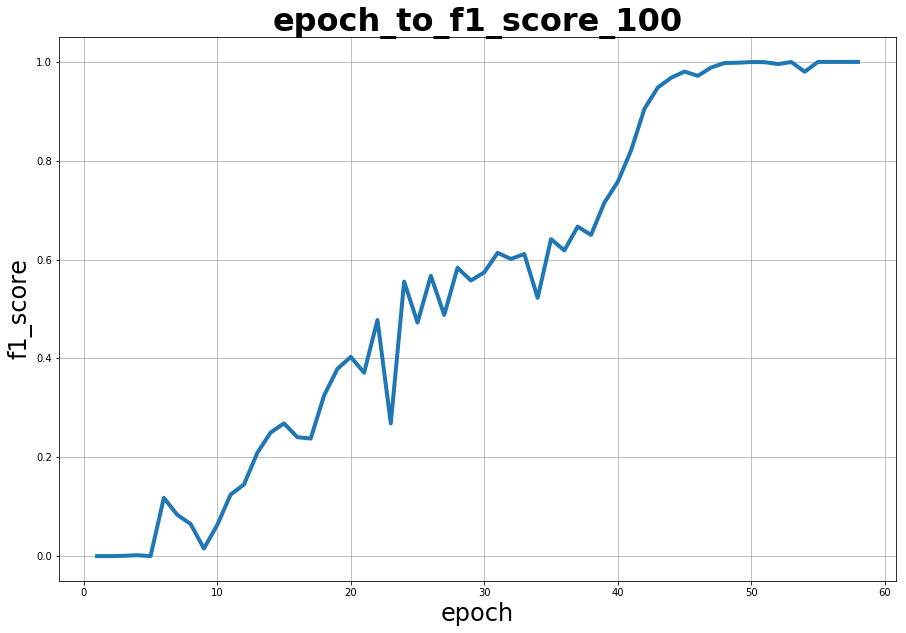

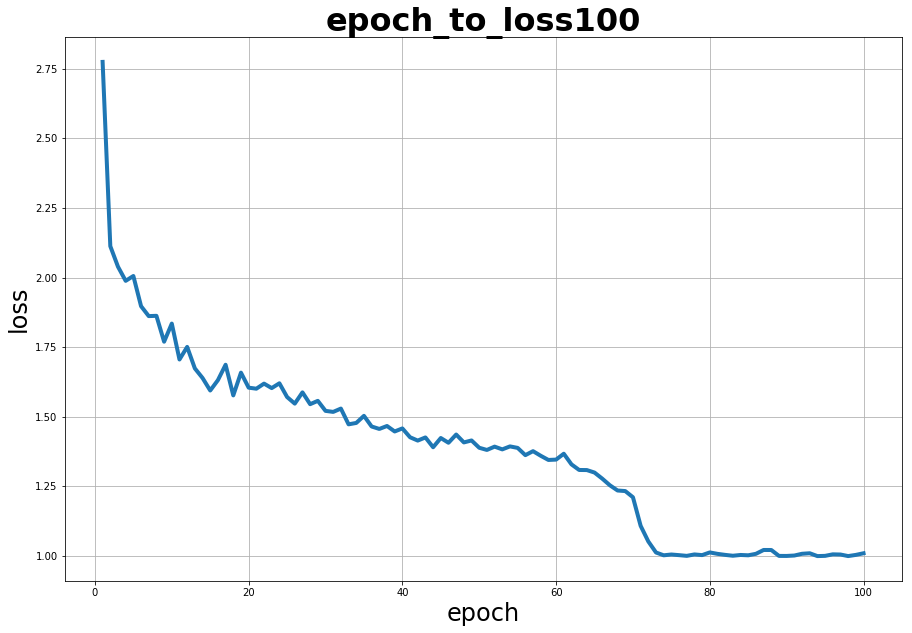

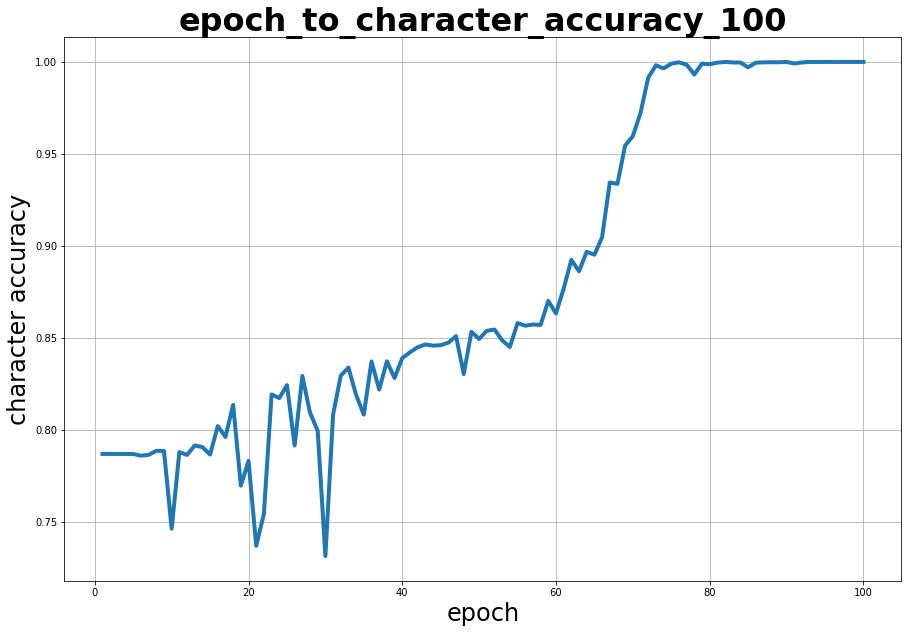

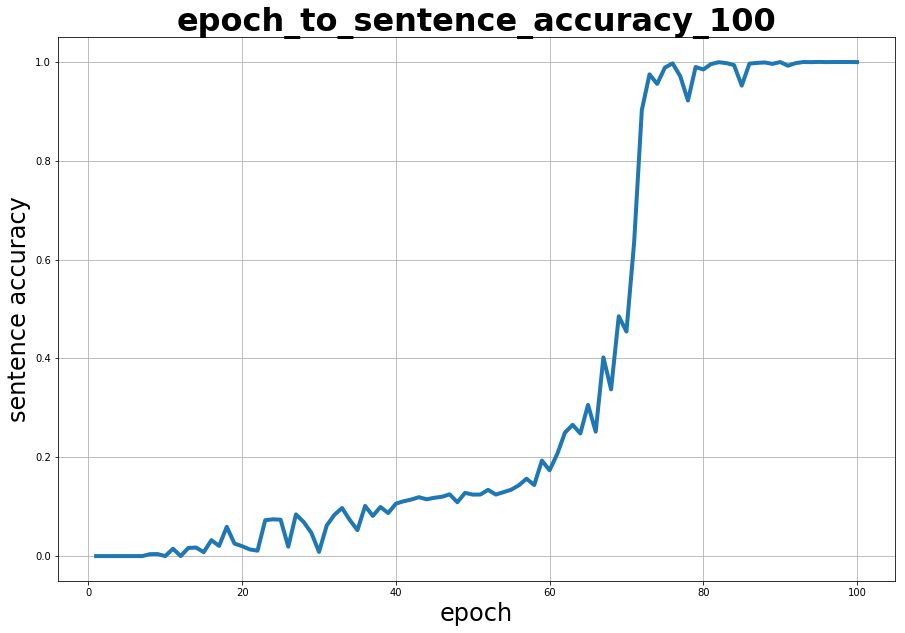

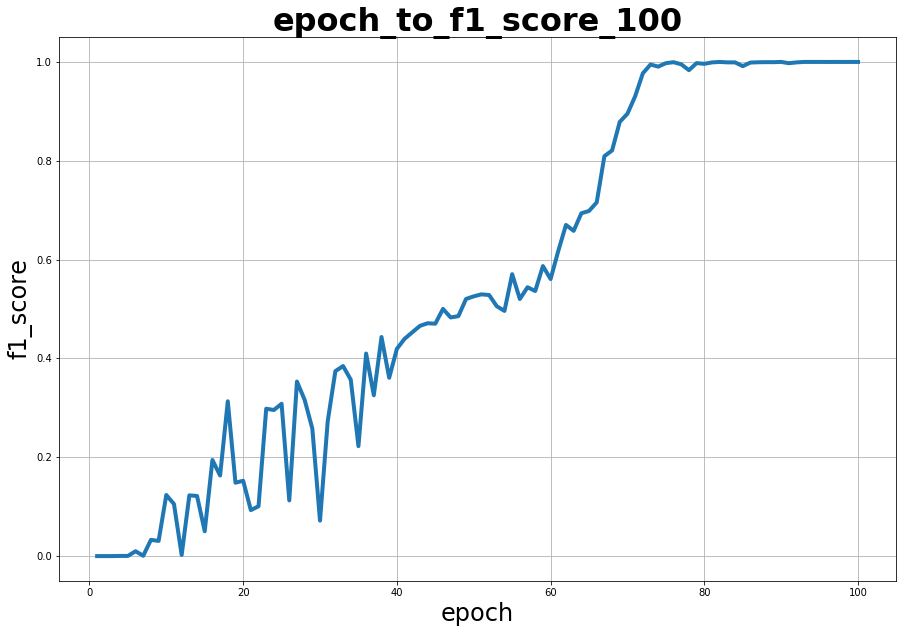

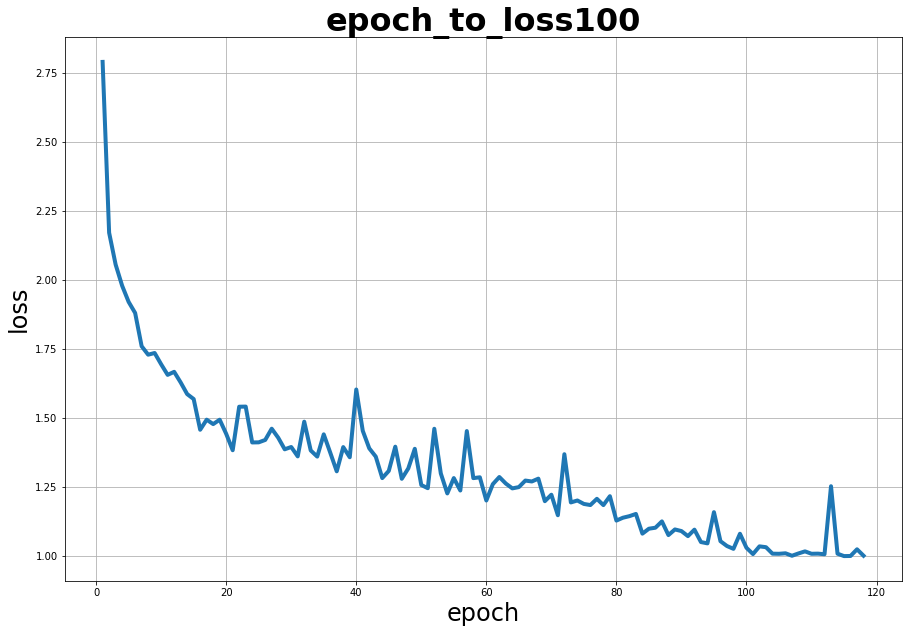

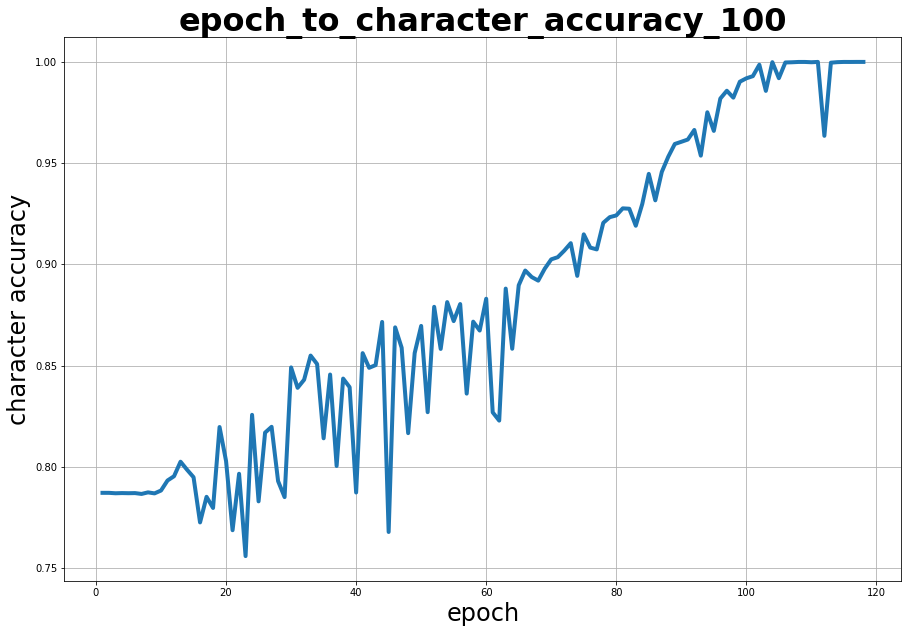

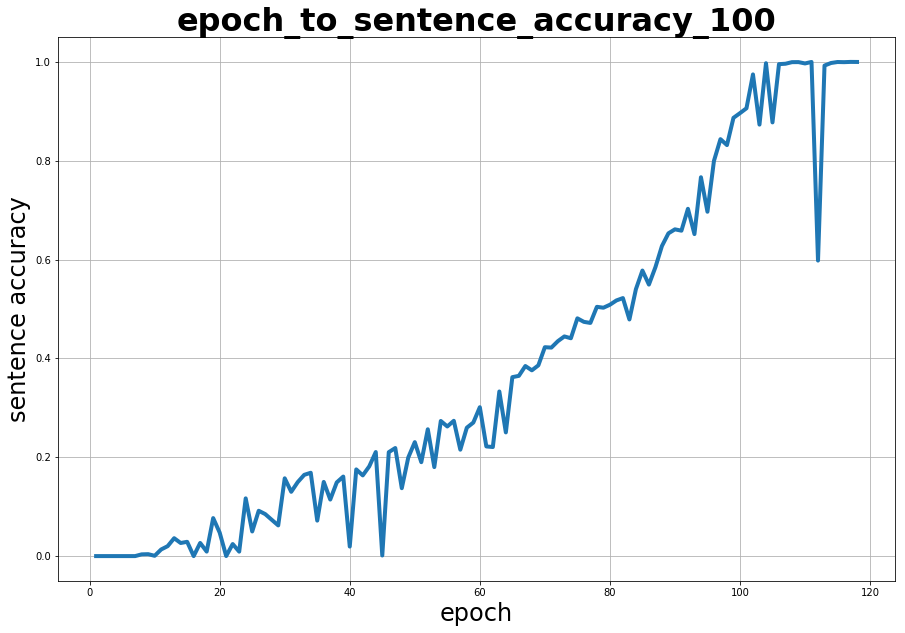

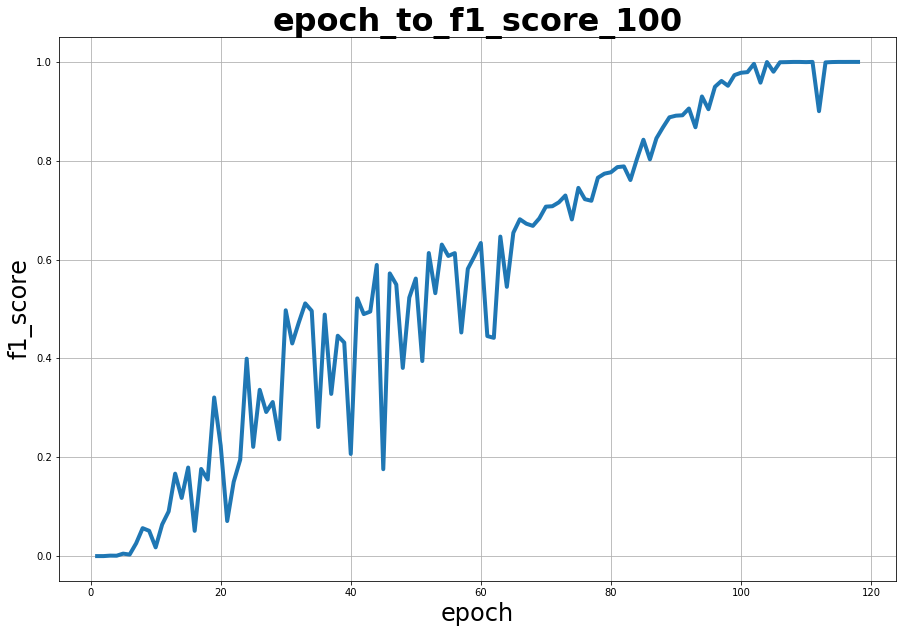

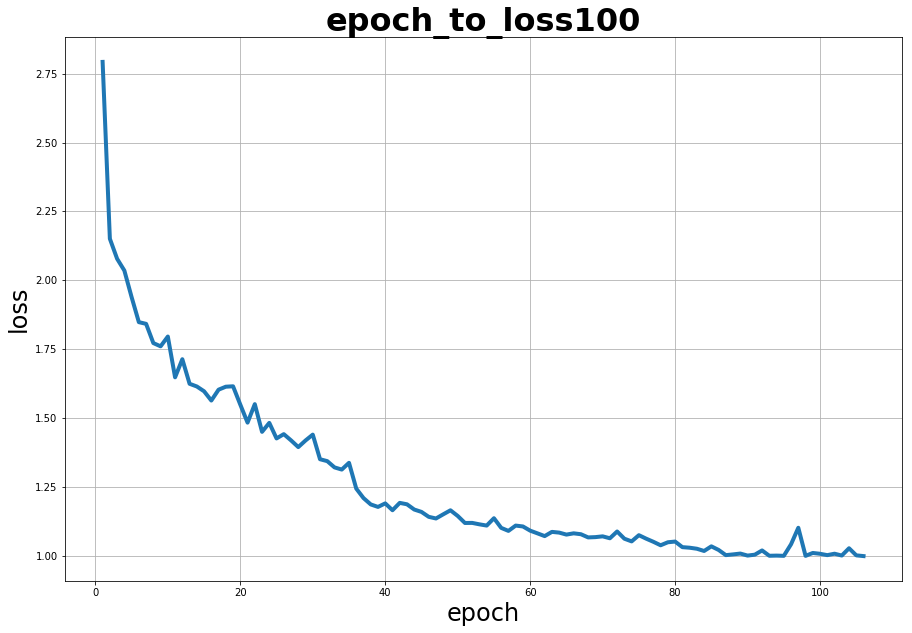

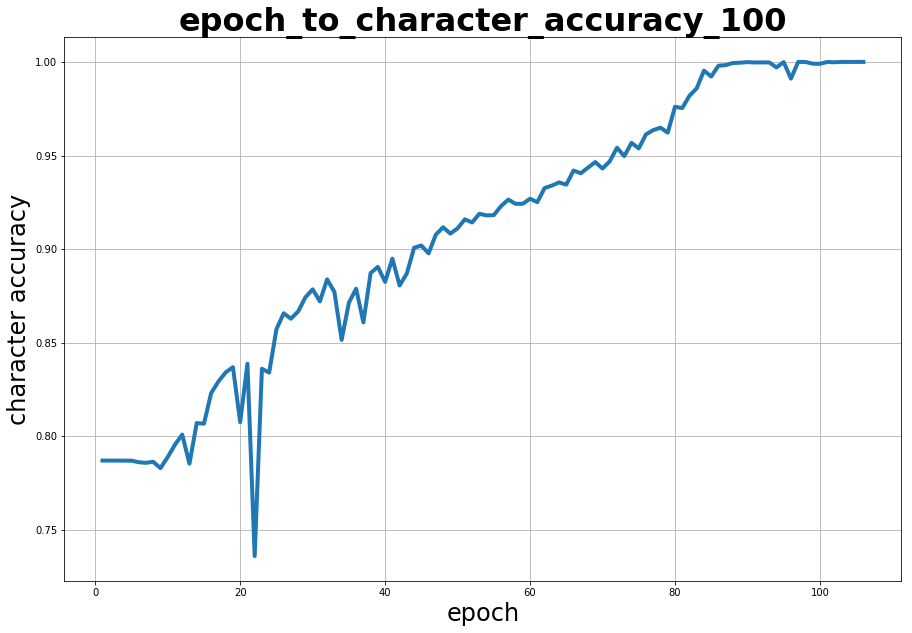

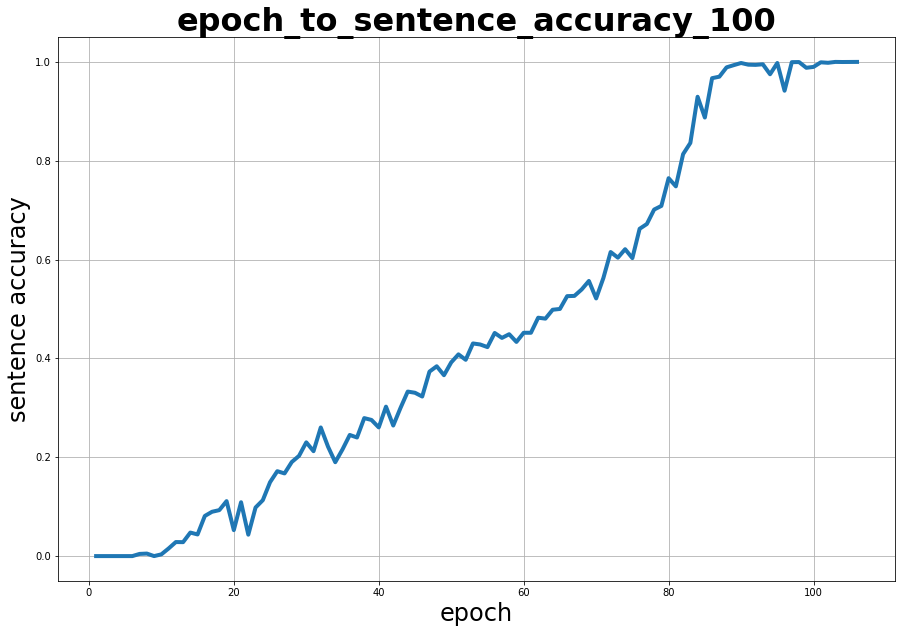

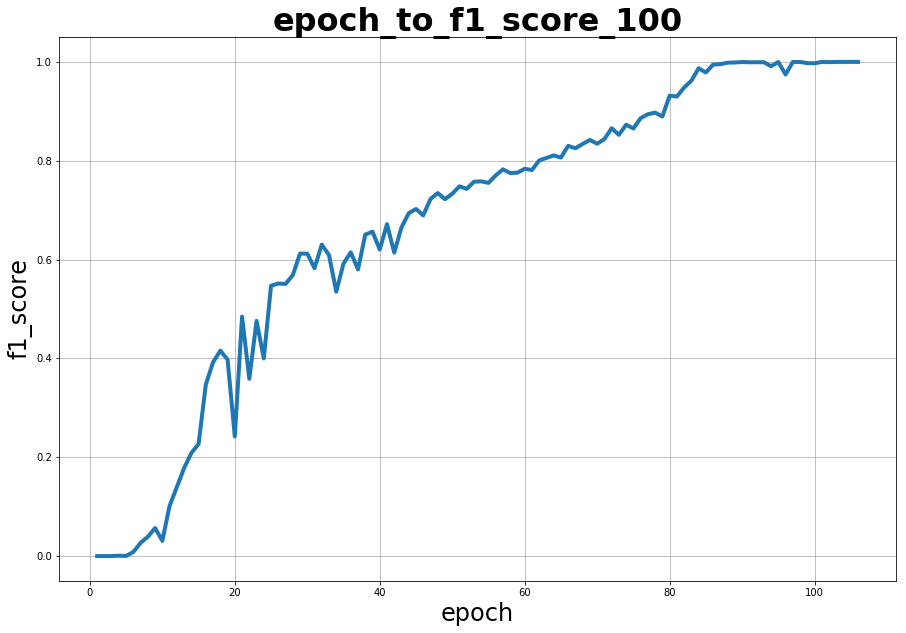

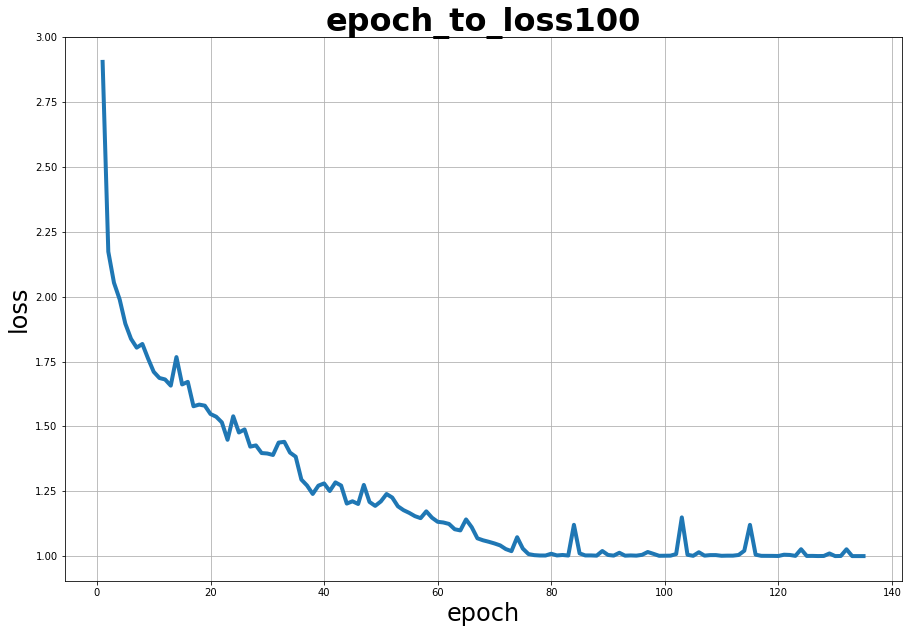

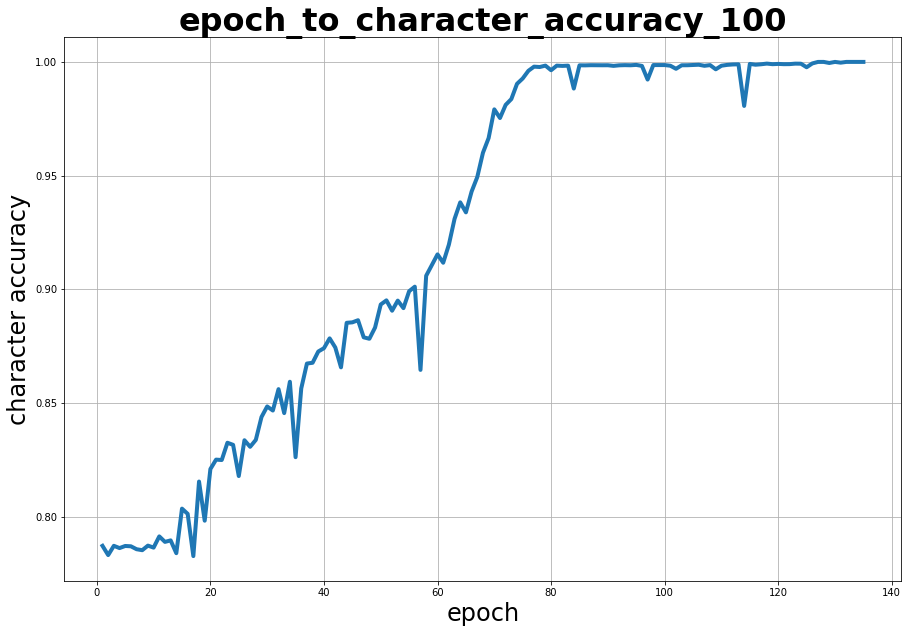

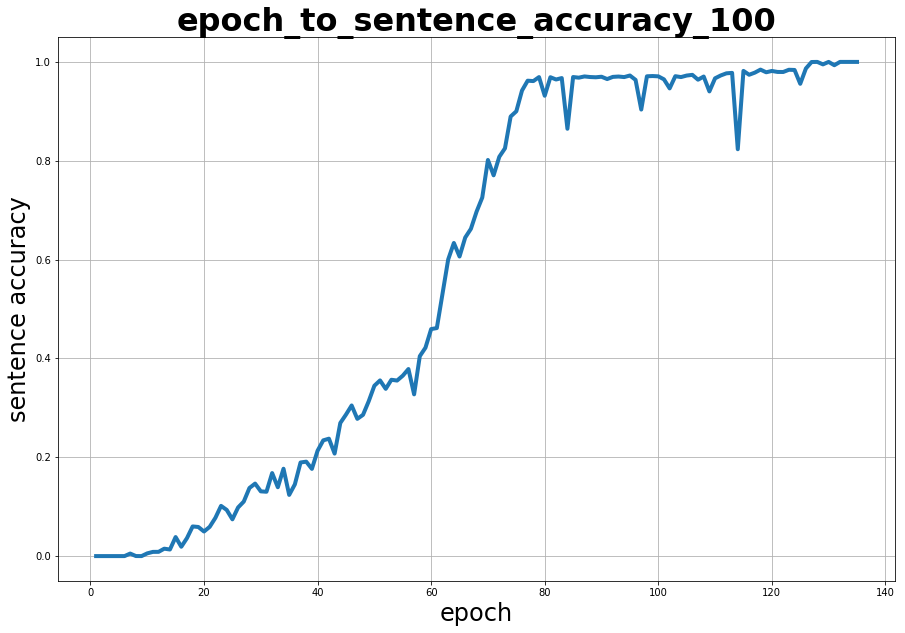

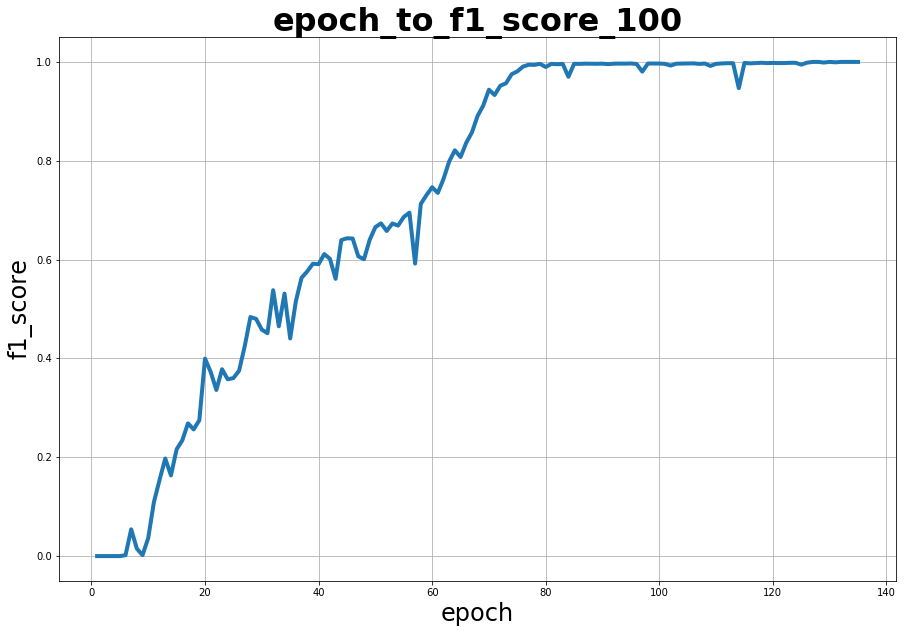

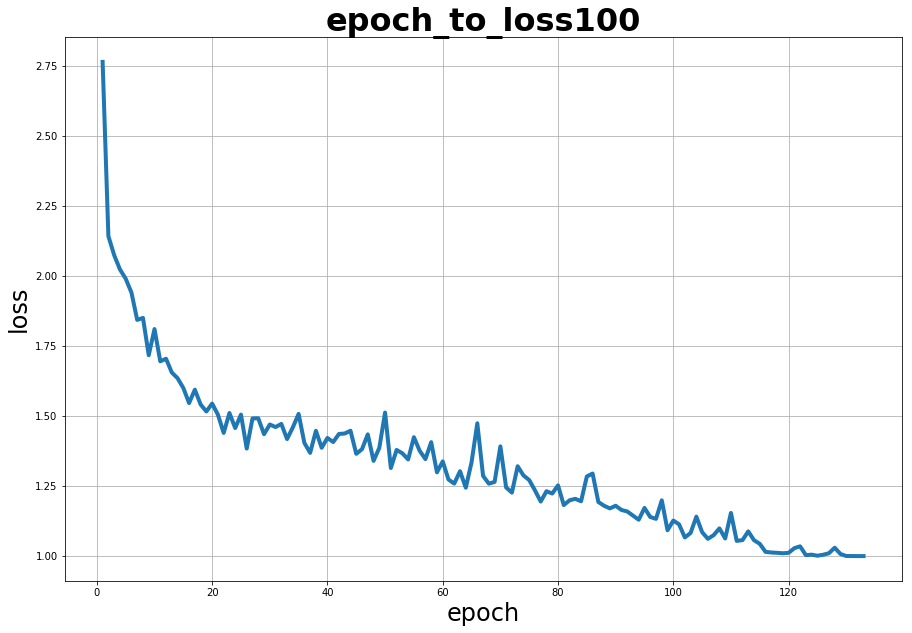

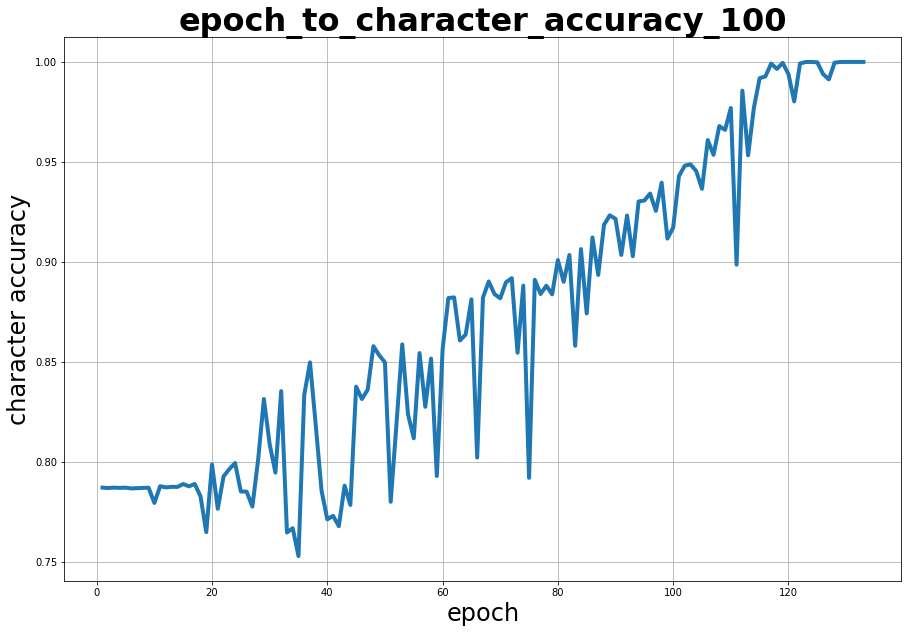

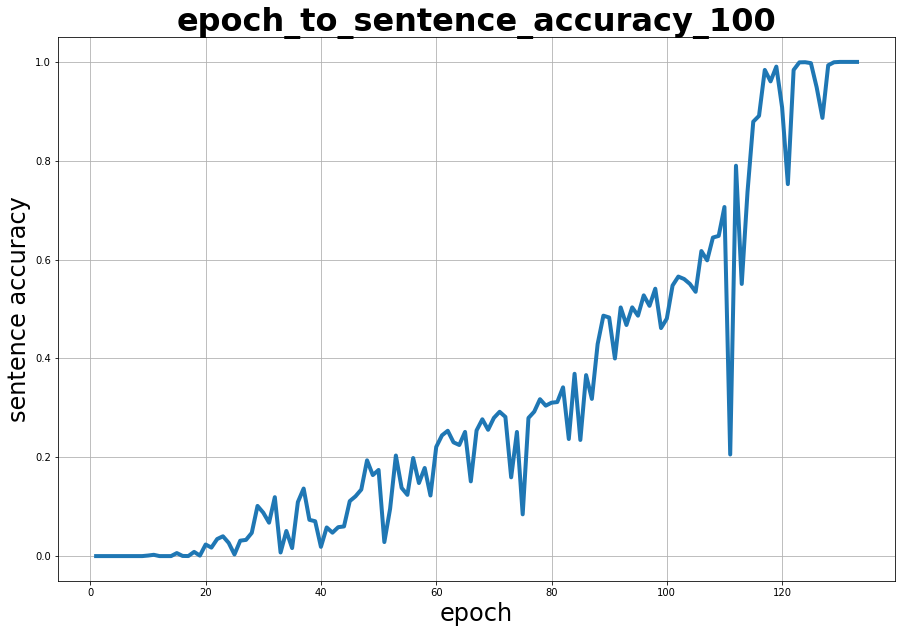

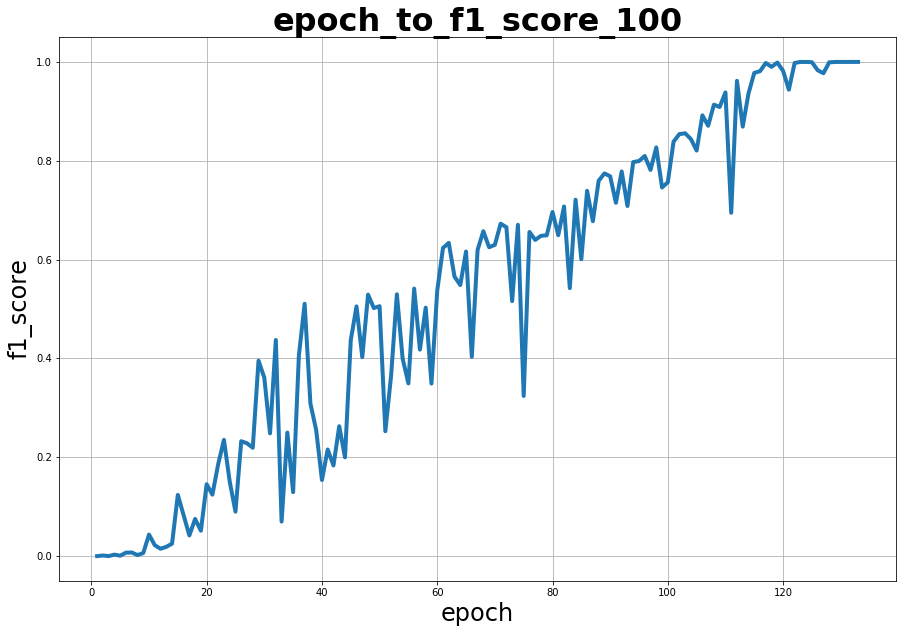

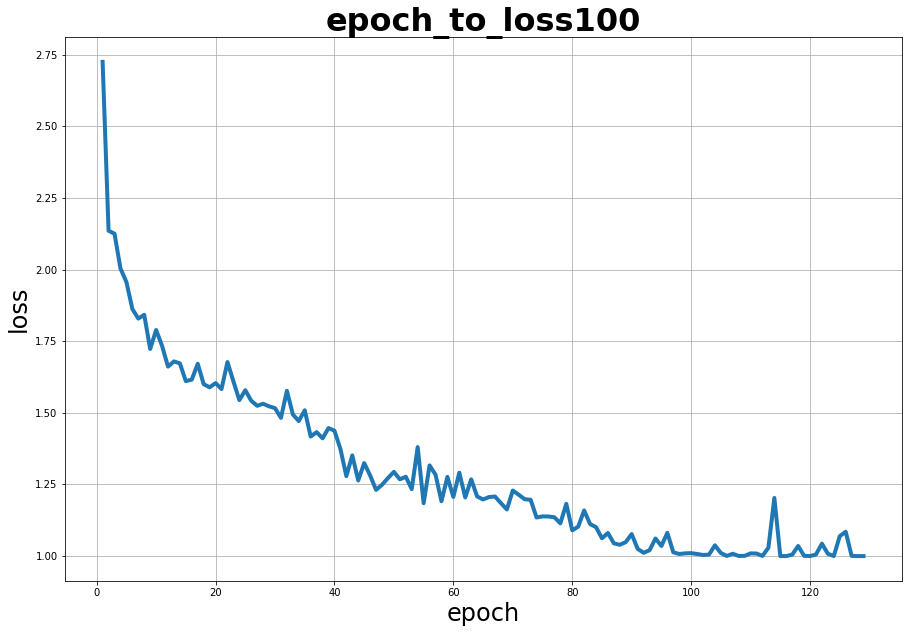

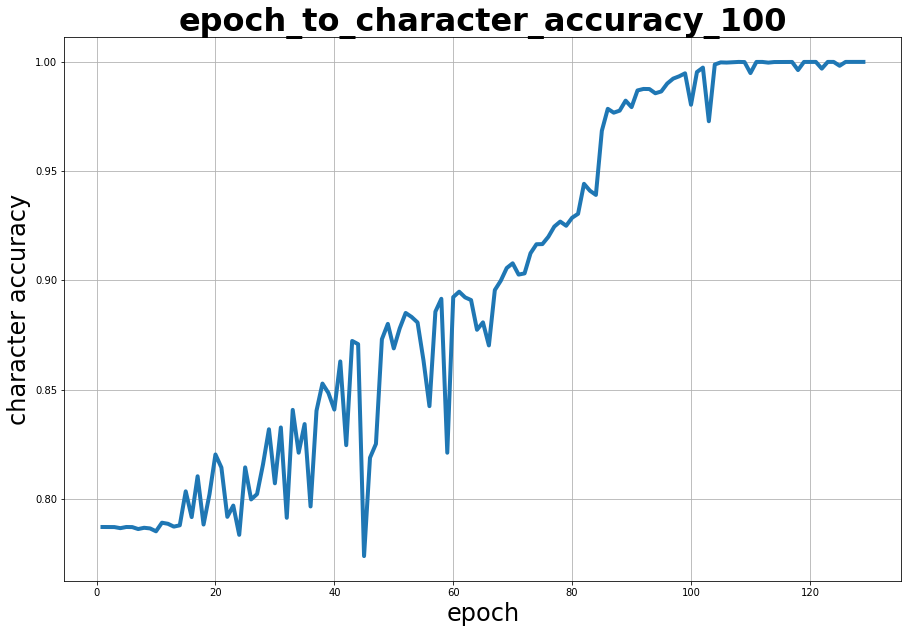

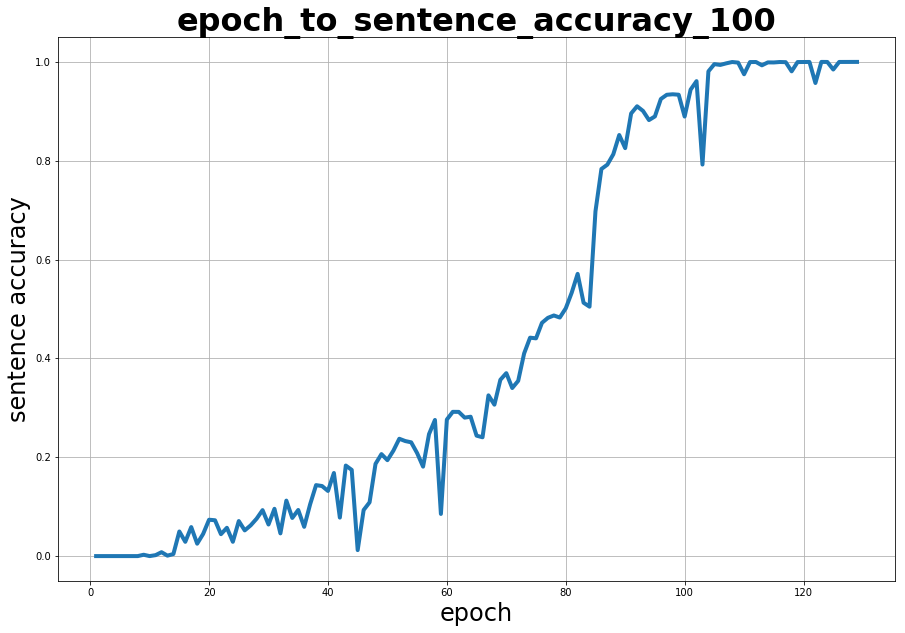

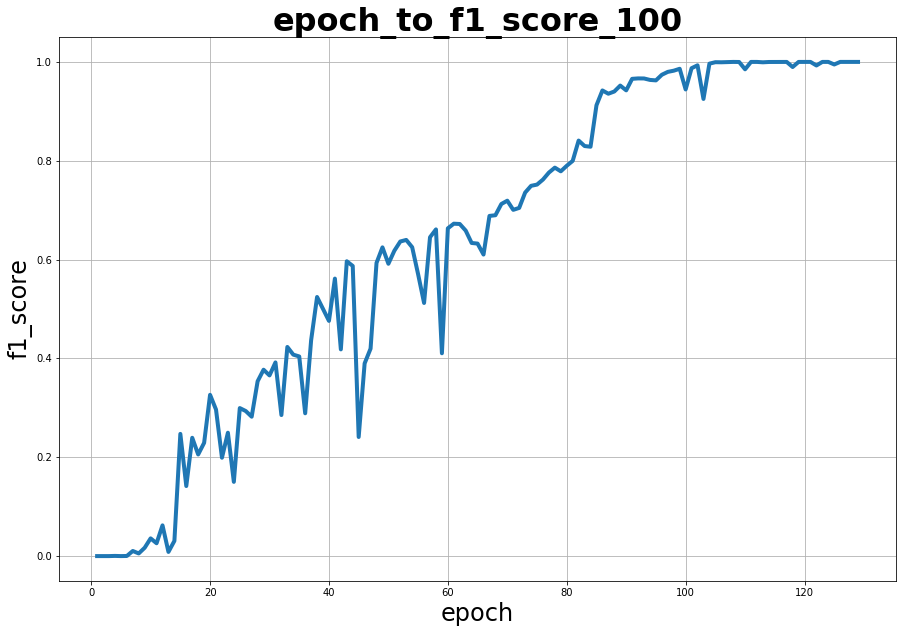

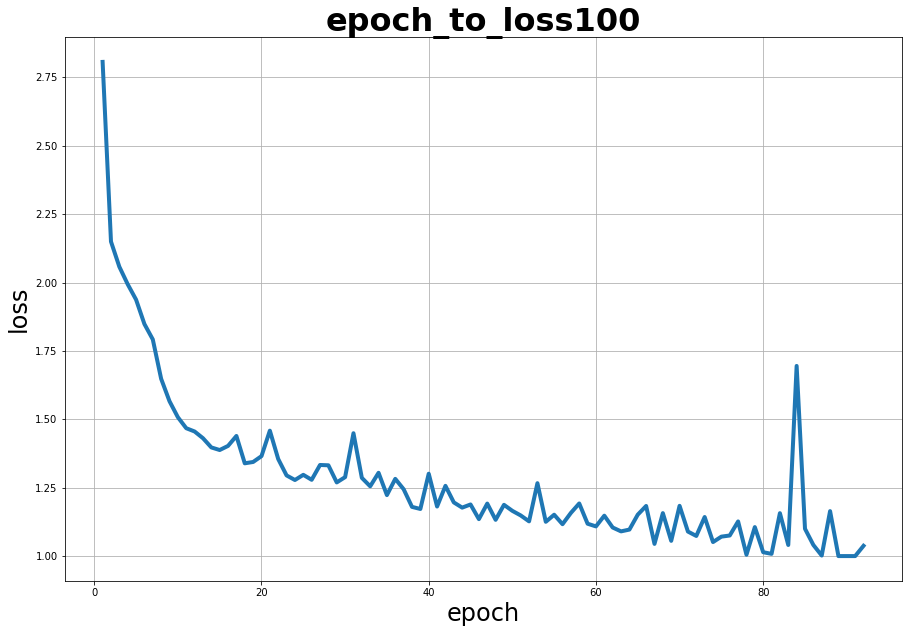

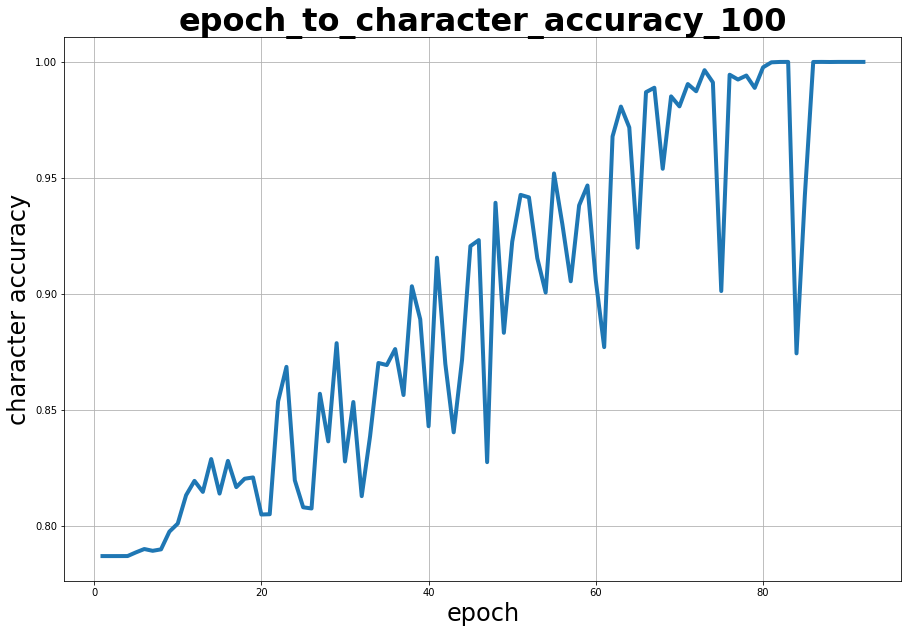

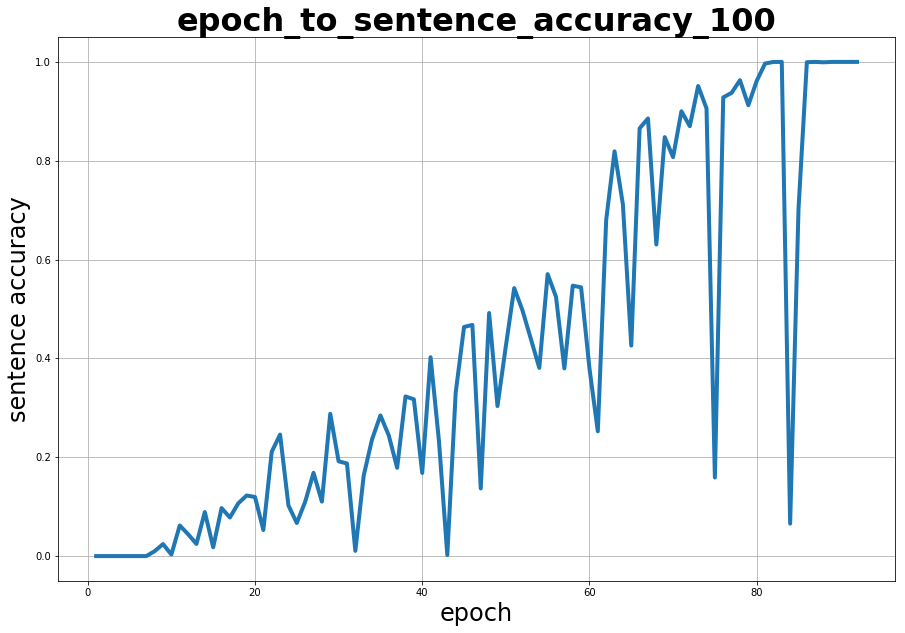

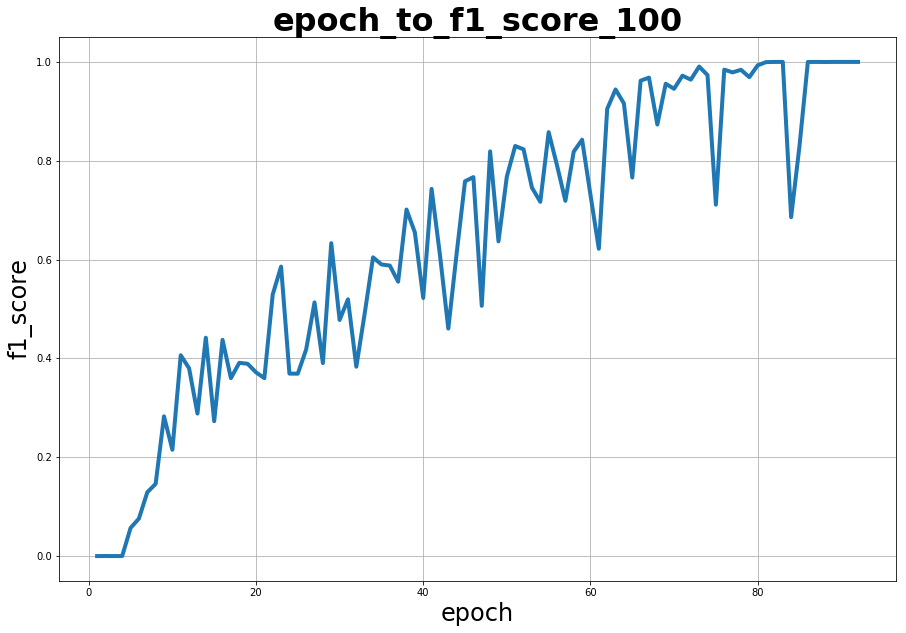

In [4]:
for i in iterator:
        print("rnn : %s" % rnn)
        max_len = 65
        src = fields.SourceField()
        srcp = fields.SourceField()
        tgt = fields.TargetField()
        tgtp = fields.TargetField()
        def len_filter(example):
            return len(example.src) <= max_len and len(example.tgt) <= max_len
        train = torchtext.data.TabularDataset(
            path=train_path, format='tsv',
            fields=[('src', src), ('tgt', tgt)],
            filter_pred=len_filter
        )
        dev = torchtext.data.TabularDataset(
            path=dev_path, format='tsv',
            fields=[('src', src), ('tgt', tgt)],
            filter_pred=len_filter
        )
        src.build_vocab(train)
        tgt.build_vocab(train)
        input_vocab = src.vocab
        output_vocab = tgt.vocab

        print("src vocab size = %d" % (len(src.vocab)))
        print("tat vacab size = %d" % (len(tgt.vocab)))

        weight = torch.ones(len(tgt.vocab))
        pad = tgt.vocab.stoi[tgt.pad_token]
        loss = Perplexity(weight, pad)
        if torch.cuda.is_available():
            loss.cuda()
        '''
        {
            "max_len": 104,
            "embedding_size": 5,
            "hidden_size": 200,
            "input_dropout_p": 0,
            "dropout_p": 0,
            "n_layers": 1,
            "bidirectional": false,
            "rnn_cell": "lstm",
            "variable_lengths": false,
            "embedding": null,
            "update_embedding": true,
            "get_context_vector": false,
            "use_attention": true,
            "attn_layers": 1,
            "hard_attn": false,
            "position_embedding": false,
            "pos_add": "add"
        }

        '''

        optimizer = "Adam"
        seq2seq = None
        config_json = open(config_path).read()
        config = json.loads(config_json)
        config["max_len"] = max_len
        config["hidden_size"] = 100
        config["rnn_cell"] = rnn
        config["embedding_size"] = 20
        config["use_attention"] = True
        config["position_embedding"] = "length"
        config["use_memory"] = "queue"
        #config["pos_add"] = "cat"

        print("Train_path : %s" % train_path)
        print("Dev_path = %s" % dev_path)
        print(json.dumps(config, indent=4))

        save_path = (data_name + "_rand_" + dir_name
                        + ("_att" if config["use_attention"] else "")
                        + ("_with_pos_" + config["position_embedding"] if config["position_embedding"] is not None else "")
                        + ("_cat" if config["pos_add"] == "cat" else "")
                        + ("_use_stack" if config["use_memory"] == "stack" else "")
                        + ("_use_queue" if config["use_memory"] == "queue" else "")
                        + "_emb" + str(config["embedding_size"])
                        + "_hidden" + str(config["hidden_size"])
                        + ("_pretrained" if pretrained_dir_name is not None else ""))
        print("Save_path : %s" % save_path)
        
        if pretrained_dir_name is not None:
            pretrained_path = ("pretrained_weights/"+ data_name + "_rand_" + pretrained_dir_name
                        + ("_att" if config["use_attention"] else "")
                        + ("_with_pos_" + config["position_embedding"] if config["position_embedding"] is not None else "")
                        + ("_cat" if config["pos_add"] == "cat" else "")
                        + ("_use_stack" if config["use_memory"] == "stack" else "")
                        + ("_use_queue" if config["use_memory"] == "queue" else "")
                        + "_emb" + str(config["embedding_size"])
                        + "_hidden" + str(config["hidden_size"])
                        + "_"+rnn+"_"+str(i))
            pretrained_pos_weight = np.load(pretrained_path+"/decoder_pos_weight.npy")
            seq2seq = Seq2seq(config, len(src.vocab), len(tgt.vocab), tgt.sos_id, tgt.eos_id,
                              pretrained_pos_weight)
        else :
            seq2seq = Seq2seq(config, len(src.vocab), len(tgt.vocab), tgt.sos_id, tgt.eos_id)
        
        if torch.cuda.is_available():
            seq2seq.cuda()

        for param in seq2seq.parameters():
            param.data.uniform_(-0.08, 0.08)

        # train
        t = Trainer(loss=loss, batch_size=128,
                    learning_rate=0.002,
                    checkpoint_every=50,
                    print_every=100,
                    hidden_size=config["hidden_size"],
                    path=save_path,
                    file_name=config["rnn_cell"] + "_" + str(i))

        seq2seq, ave_loss, character_accuracy_list, sentence_accuracy_list, f1_score_list = t.train(seq2seq, train,
                                                                                 num_epochs=epochs, dev_data=dev,
                                                                                 optimizer=optimizer,
                                                                                 teacher_forcing_ratio=0.5)

        character_accuracy.append(character_accuracy_list)
        sentence_accuracy.append(sentence_accuracy_list)
        f1_score.append(f1_score_list)
        best_f1_score.append(max(f1_score_list))

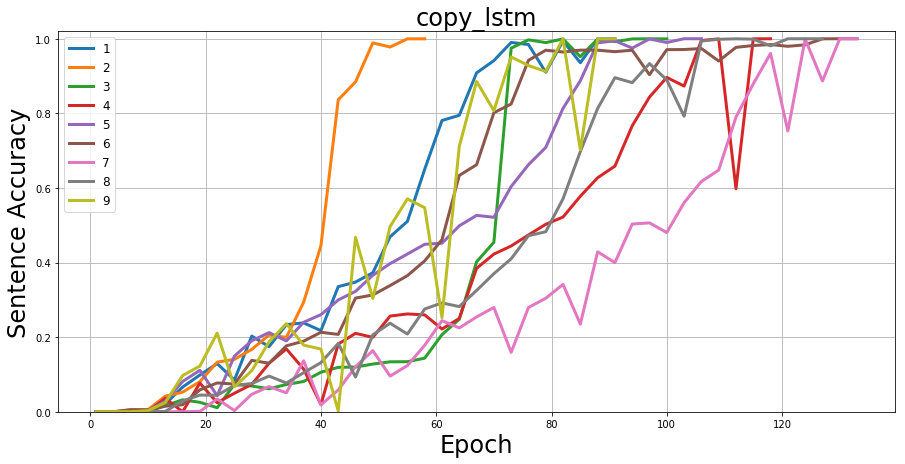

In [5]:
plt.figure(figsize=(15,7))
for j in range(len(sentence_accuracy)):
    plt.plot(list(range(1, len(sentence_accuracy[j])+1, 1))[::3], sentence_accuracy[j][::3], '-', LineWidth=3, label=str(j+1))

plt.legend(loc="best", fontsize=12)
plt.title(data_name+"_"+rnn, fontsize=24)
plt.xlabel('Epoch', fontsize=24)
plt.ylabel('Sentence Accuracy', fontsize=24)
plt.ylim([0, 1.02])
plt.grid()
#plt.savefig('')

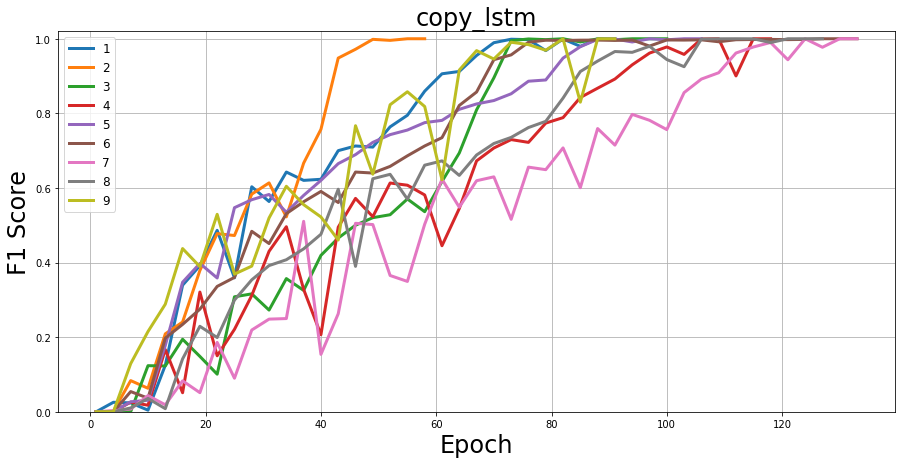

In [6]:
plt.figure(figsize=(15,7))
for j in range(len(f1_score)):
    plt.plot(list(range(1, len(f1_score[j])+1, 1))[::3], f1_score[j][::3], '-', LineWidth=3, label=str(j+1))

plt.legend(loc="best", fontsize=12)
plt.title(data_name+"_"+rnn, fontsize=24)
plt.xlabel('Epoch', fontsize=24)
plt.ylabel('F1 Score', fontsize=24)
plt.ylim([0, 1.02])
plt.grid()
#plt.savefig('')

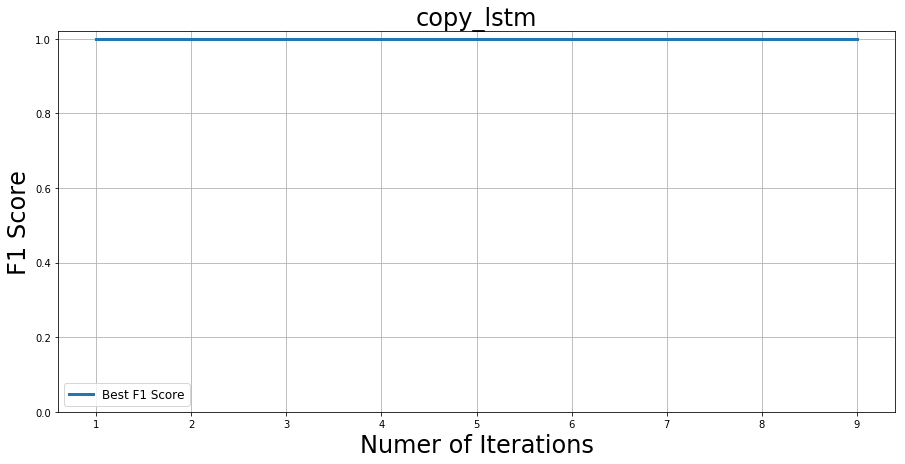

In [7]:
plt.figure(figsize=(15,7))
plt.plot(list(range(1, len(best_f1_score)+1)), best_f1_score, '-', LineWidth=3, label="Best F1 Score")

plt.legend(loc="best", fontsize=12)
plt.xlabel('Numer of Iterations', fontsize=24)
plt.title(data_name+"_"+rnn, fontsize=24)
plt.ylabel('F1 Score', fontsize=24)
plt.ylim([0, 1.02])
plt.grid()
#plt.savefig('')

In [8]:
print(f1_score)

[[0, 0, 0.03938451726062345, 0.025532094773106757, 0.059481172210459655, 0.002494265416564595, 0.023881505970376495, 0.013873388914418257, 0.00026815642458100563, 0.004405188332925445, 0.15744406592394808, 0.1519843630492054, 0.1246194438806576, 0.27502611577392744, 0.33224711007443486, 0.33934426229508197, 0.3557687519710525, 0.4648917369502435, 0.39174648425956504, 0.5081634933048182, 0.4865672131685621, 0.48646901265355125, 0.5430467526657221, 0.5560943779567261, 0.3591783617515269, 0.5548993441040347, 0.5494029536499534, 0.6032286435725026, 0.5802702351940242, 0.6018798254447801, 0.5637181409295352, 0.6233493312129044, 0.6327237408784777, 0.6426586499595796, 0.6501808597899607, 0.6496431611340274, 0.6203280304482354, 0.6709788702026735, 0.6762013884208399, 0.6232460418698882, 0.6958812260536398, 0.6832012951683321, 0.7000276617885324, 0.7146223361557783, 0.7083639330885354, 0.7125713536639139, 0.7229294951708158, 0.7369275333366629, 0.7095317299403886, 0.7162928272122258, 0.7445545

In [9]:
print(best_f1_score)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [10]:
print(sum(best_f1_score, 0.0)/len(best_f1_score))

1.0
